# House Price Prediction

#### prodigy infotech-- Intership project submitted by TELS MARIYA THOMAS ( in November 2023)
Task-01

Implement a linear regression model to predict the prices of houses based on their square footage and the number of bedrooms and bathrooms.



Dataset : - https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

In [1]:
# import the libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load and read the Data

In [2]:
train_ini=pd.read_csv(r"C:\Users\telsm\Documents\datascience\data science\extra\Prodigy infotech\task 1\train.csv")
test_ini=pd.read_csv(r"C:\Users\telsm\Documents\datascience\data science\extra\Prodigy infotech\task 1\test.csv")

In [3]:
train_ini.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [4]:
# load the description

# Open the text file in read mode
with open('data_description.txt', 'r') as file:
    
    # Read the contents of the file
    file_contents = file.read()

# Print the contents of the file
print(file_contents)


MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [5]:
# checking the info
train_ini.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# The data has 80 features with 3 float, 35 integer and 43 object columns
# the data has 1460 entries 

In [7]:
train_ini.describe().T
# most of the columns are skewed. could be due to presence of potential outliers in the data. 

count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
T

In [8]:
train_ini.describe(include=object).T

count unique      top  freq
MSZoning       1460      5       RL  1151
Street         1460      2     Pave  1454
Alley            91      2     Grvl    50
LotShape       1460      4      Reg   925
LandContour    1460      4      Lvl  1311
Utilities      1460      2   AllPub  1459
LotConfig      1460      5   Inside  1052
LandSlope      1460      3      Gtl  1382
Neighborhood   1460     25    NAmes   225
Condition1     1460      9     Norm  1260
Condition2     1460      8     Norm  1445
BldgType       1460      5     1Fam  1220
HouseStyle     1460      8   1Story   726
RoofStyle      1460      6    Gable  1141
RoofMatl       1460      8  CompShg  1434
Exterior1st    1460     15  VinylSd   515
Exterior2nd    1460     16  VinylSd   504
MasVnrType     1452      4     None   864
ExterQual      1460      4       TA   906
ExterCond      1460      5       TA  1282
Foundation     1460      6    PConc   647
BsmtQual       1423      4       TA   649
BsmtCond       1423      4       TA  1311
BsmtExposure   1422      4       No   953
BsmtFinType1   1423      6      Unf   430
BsmtFinType2   1422      6      Unf  1256
Heating        1460      6     GasA  1428
HeatingQC      1460      5       Ex   741
CentralAir     1460      2        Y  1365
Electrical     1459      5    SBrkr  1334
KitchenQual    1460      4       TA   735
Functional     1460      7      Typ  1360
FireplaceQu     770      5       Gd   380
GarageType     1379      6   Attchd   870
GarageFinish   1379      3      Unf   605
GarageQual     1379      5       TA  1311
GarageCond     1379      5       TA  1326
PavedDrive     1460      3        Y  1340
PoolQC            7      3       Gd     3
Fence           281      4    MnPrv   157
MiscFeature      54      4     Shed    49
SaleType       1460      9       WD  1267
SaleCondition  1460      6   Normal  1198

# Exploratory Data Analysis and Visualization

In [9]:
# copy the dataframe 
df=train_ini.copy()

# Missing value treatment

In [10]:
# checking for missing values
(((df.isnull().sum())/df.shape[0])*100)[(((df.isnull().sum())/df.shape[0])*100)!=0]

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

#### 'LotFrontage'

In [11]:
# LotFrontage: Linear feet of street connected to property
df['LotFrontage']

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1460, dtype: float64

In [12]:
# impute the null values of LotFrontage with median afte rgrouping by neighbourhood. 
# Using 'Neighborhood' to fill missing 'LotFrontage' values
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

#### 'Alley

In [13]:
# in the description it says that NA means no alley access. so impute the mising values with noaccess
# Alley: Type of alley access to property

      # Grvl	Gravel
      # Pave	Paved
      # NA 	No alley access
df['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [14]:
df['Alley'] = df['Alley'].fillna('noaccess')

#### MasVnrType

In [16]:
# MasVnrType: Masonry veneer type

      # BrkCmn	Brick Common
      # BrkFace	Brick Face
      # CBlock	Cinder Block
      # None	None
      #  Stone	Stone
df['MasVnrType'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [17]:
df['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [18]:
# impute the null values in MasVnrType with the highest occuring value. i.e None 
df['MasVnrType']=df['MasVnrType'].fillna('None')

#### MasVnrArea 

In [19]:
# fill the null values with median 
# MasVnrArea: Masonry veneer area in square feet
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].median())

### Basemnet related columns

#### BsmtQual 

In [20]:
#BsmtQual: Evaluates the height of the basement

      # Ex	Excellent (100+ inches)	
      # Gd	Good (90-99 inches)
      # TA	Typical (80-89 inches)
      # Fa	Fair (70-79 inches)
      # Po	Poor (<70 inches
     #  NA	No Basement
df['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

#### BsmtCond

In [21]:
# BsmtCond: Evaluates the general condition of the basement

      # Ex	Excellent
      # Gd	Good
      # TA	Typical - slight dampness allowed
      # Fa	Fair - dampness or some cracking or settling
      # Po	Poor - Severe cracking, settling, or wetness
      # NA	No Basement
df['BsmtCond'].unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

#### BsmtExposure

In [22]:
# BsmtExposure: Refers to walkout or garden level walls

     #  Gd	Good Exposure
     # Av	Average Exposure (split levels or foyers typically score average or above)	
     #  Mn	Mimimum Exposure
     #  No	No Exposure
     #  NA	No Basement
df['BsmtExposure'].unique()    

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

#### BsmtFinType1

In [23]:
#BsmtFinType1: Rating of basement finished area

     #  GLQ	Good Living Quarters
     #  ALQ	Average Living Quarters
     #  BLQ	Below Average Living Quarters	
     #  Rec	Average Rec Room
    #   LwQ	Low Quality
    #   Unf	Unfinshed
    #   NA	No Basement
df['BsmtFinType1'].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

#### BsmtFinType2

In [24]:
# BsmtFinType2: Rating of basement finished area (if multiple types)

    #   GLQ	Good Living Quarters
    #   ALQ	Average Living Quarters
    #   BLQ	Below Average Living Quarters	
    #   Rec	Average Rec Room
    #   LwQ	Low Quality
    #   Unf	Unfinshed
    #  NA	No Basement
df['BsmtFinType2'].unique()

array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

In [24]:
#### all the basement realted columns has null values where there is no basement 

In [25]:
# imputing Na with nill from analysing the description
df['BsmtQual']=df['BsmtQual'].fillna('Nobasement')

In [26]:
# imputing Na with nill from analysing the description
df['BsmtCond']=df['BsmtCond'].fillna('Nobasement')

In [27]:
# imputing Na with nill from analysing the description
df['BsmtExposure']=df['BsmtExposure'].fillna('Nobasement')

In [28]:
# imputing Na with nill from analysing the description
df['BsmtFinType1']=df['BsmtFinType1'].fillna('Nobasement')

In [29]:
# imputing Na with nill from analysing the description
df['BsmtFinType2']=df['BsmtFinType2'].fillna('Nobasement')

#### Electrical

In [30]:
# Electrical: Electrical system

      #  SBrkr	Standard Circuit Breakers & Romex
      #  FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
      #  FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
      #  FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
      #  Mix	Mixed
df['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [31]:
df['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [32]:
# impute with mode 
df['Electrical']=df['Electrical'].fillna('SBrkr')

#### FireplaceQu

In [33]:
# FireplaceQu: Fireplace quality

      #  Ex	Excellent - Exceptional Masonry Fireplace
      # Gd	Good - Masonry Fireplace in main level
      # TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
      # Fa	Fair - Prefabricated Fireplace in basement
      # Po	Poor - Ben Franklin Stove
      # NA	No Fireplace
df['FireplaceQu'].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [34]:
# imputing Na with nill from analysing the description
df['FireplaceQu']=df['FireplaceQu'].fillna('Nofireplace')

#### GarageType

In [35]:
# GarageType: Garage location

     #  2Types	More than one type of garage
     #  Attchd	Attached to home
     #  Basment	Basement Garage
     #  BuiltIn	Built-In (Garage part of house - typically has room above garage)
     #  CarPort	Car Port
     #  Detchd	Detached from home
    #   NA	No Garage
df['GarageType'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [37]:
# imputing Na with nill from analysing the description
df['GarageType']=df['GarageType'].fillna('NoGarage')

#### GarageYrBlt

In [38]:
#GarageYrBlt: Year garage was built
df['GarageYrBlt'].value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1927.0     1
1900.0     1
1906.0     1
1908.0     1
1933.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

In [39]:
# convert the column into categorical  
df['GarageYrBlt']=df['GarageYrBlt'].astype(object)

In [40]:
df['GarageYrBlt']=df['GarageYrBlt'].fillna('nogarage')

#### GarageFinish

In [41]:
# GarageFinish: Interior finish of the garage

     #  Fin	Finished
     #  RFn	Rough Finished	
     #  Unf	Unfinished
     #  NA	No Garage
df['GarageFinish'].unique()

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

In [42]:
df['GarageFinish']=df['GarageFinish'].fillna('nogarage')

#### GarageQual

In [43]:
# GarageQual: Garage quality

      # Ex	Excellent
      # Gd	Good
      # TA	Typical/Average
      # Fa	Fair
      # Po	Poor
      # NA	No Garage
df['GarageQual'].unique()

array(['TA', 'Fa', 'Gd', nan, 'Ex', 'Po'], dtype=object)

In [44]:
df['GarageQual']=df['GarageQual'].fillna('nogarage')

#### GarageCond

In [45]:
# GarageCond: Garage condition

      # Ex	Excellent
      # Gd	Good
      # TA	Typical/Average
      # Fa	Fair
      # Po	Poor
      # NA	No Garage
df['GarageCond'].unique()

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

In [46]:
df['GarageCond']=df['GarageCond'].fillna('nogarage')

#### PoolQC

In [47]:
# PoolQC: Pool quality

     #  Ex	Excellent
     #  Gd	Good
     #  TA	Average/Typical
     #  Fa	Fair
     #  NA	No Pool
df['PoolQC'].unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

In [48]:
df['PoolQC']=df['PoolQC'].fillna('nopool')

#### Fence

In [49]:
# Fence: Fence quality

      # GdPrv	Good Privacy
      # MnPrv	Minimum Privacy
      # GdWo	Good Wood
      # MnWw	Minimum Wood/Wire
      # NA	No Fence
df['Fence'].unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [50]:
df['Fence']=df['Fence'].fillna('nofence')

#### MiscFeature

In [51]:
# MiscFeature: Miscellaneous feature not covered in other categories

      # Elev	Elevator
      # Gar2	2nd Garage (if not described in garage section)
      # Othr	Other
      # Shed	Shed (over 100 SF)
      # TenC	Tennis Court
      # NA	None
df['MiscFeature'].unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [52]:
df['MiscFeature']=df['MiscFeature'].fillna('None')

In [53]:
(((df.isnull().sum())/df.shape[0])*100)[(((df.isnull().sum())/df.shape[0])*100)!=0]
# no more null values present in the dataset 

Series([], dtype: float64)

# Visualization of the Data

In [54]:
# Dropping the id column 
df1=df.drop('Id', axis=1)

In [55]:
# separating categories and numerical columns 
df_cat=df1.select_dtypes(include=object)
df_num=df1.select_dtypes(exclude=object)

### Univariate analysis

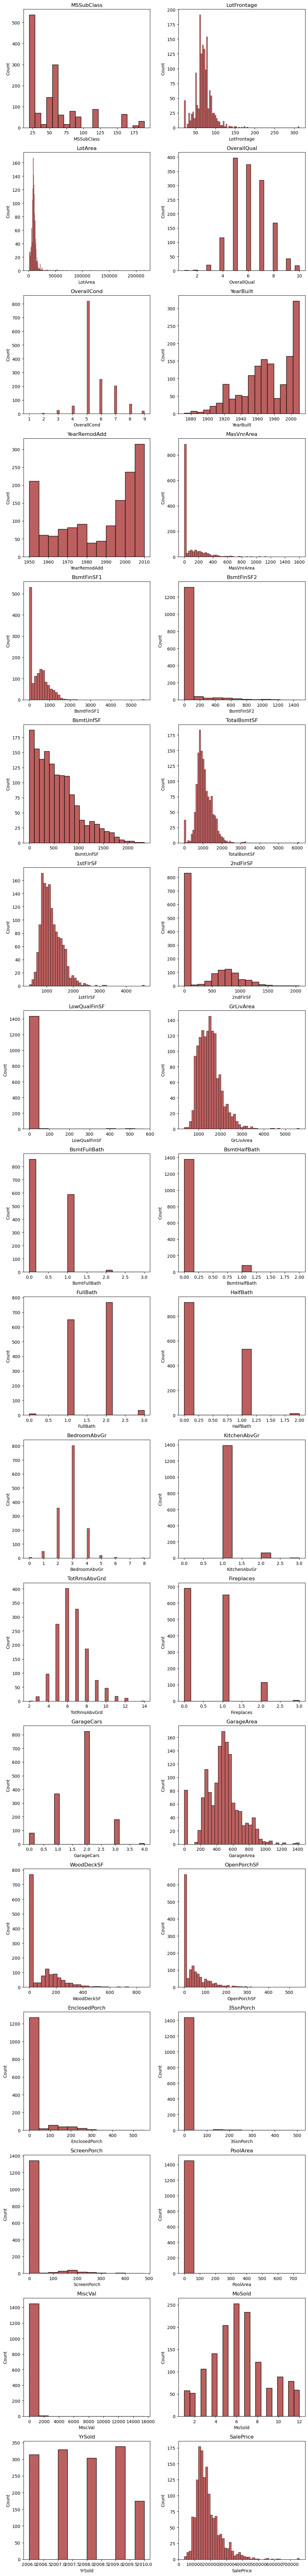

In [57]:
plt.figure(figsize=(10,100))
re=1
for i in df_num.columns:
    plt.subplot(22,2,re)
    sns.histplot(data=df, x=df_num[i], color='brown', edgecolor='black')
    plt.title(i)
    re+=1
plt.tight_layout()
plt.show()

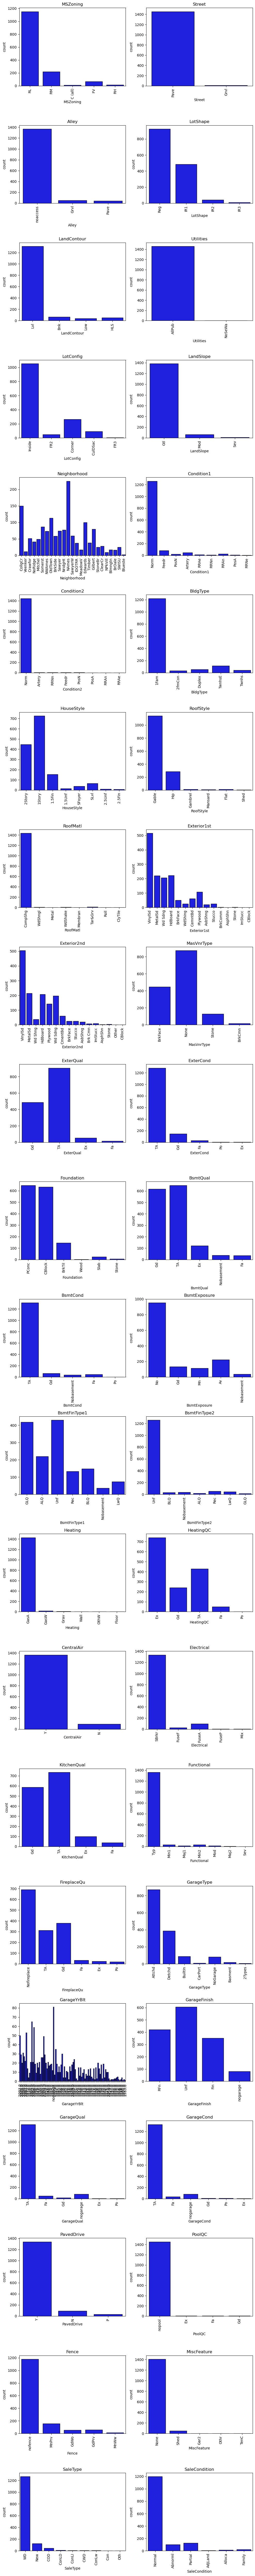

In [188]:
plt.figure(figsize=(10,100))
re=1
for i in df_cat.columns:
    plt.subplot(22,2,re)
    sns.countplot(data=df, x=df_cat[i], color='blue', edgecolor='black')
    plt.title(i)
    plt.xticks(rotation=90)
    re+=1
plt.tight_layout()
plt.show()

## Bivariate Analysis

<Axes: >

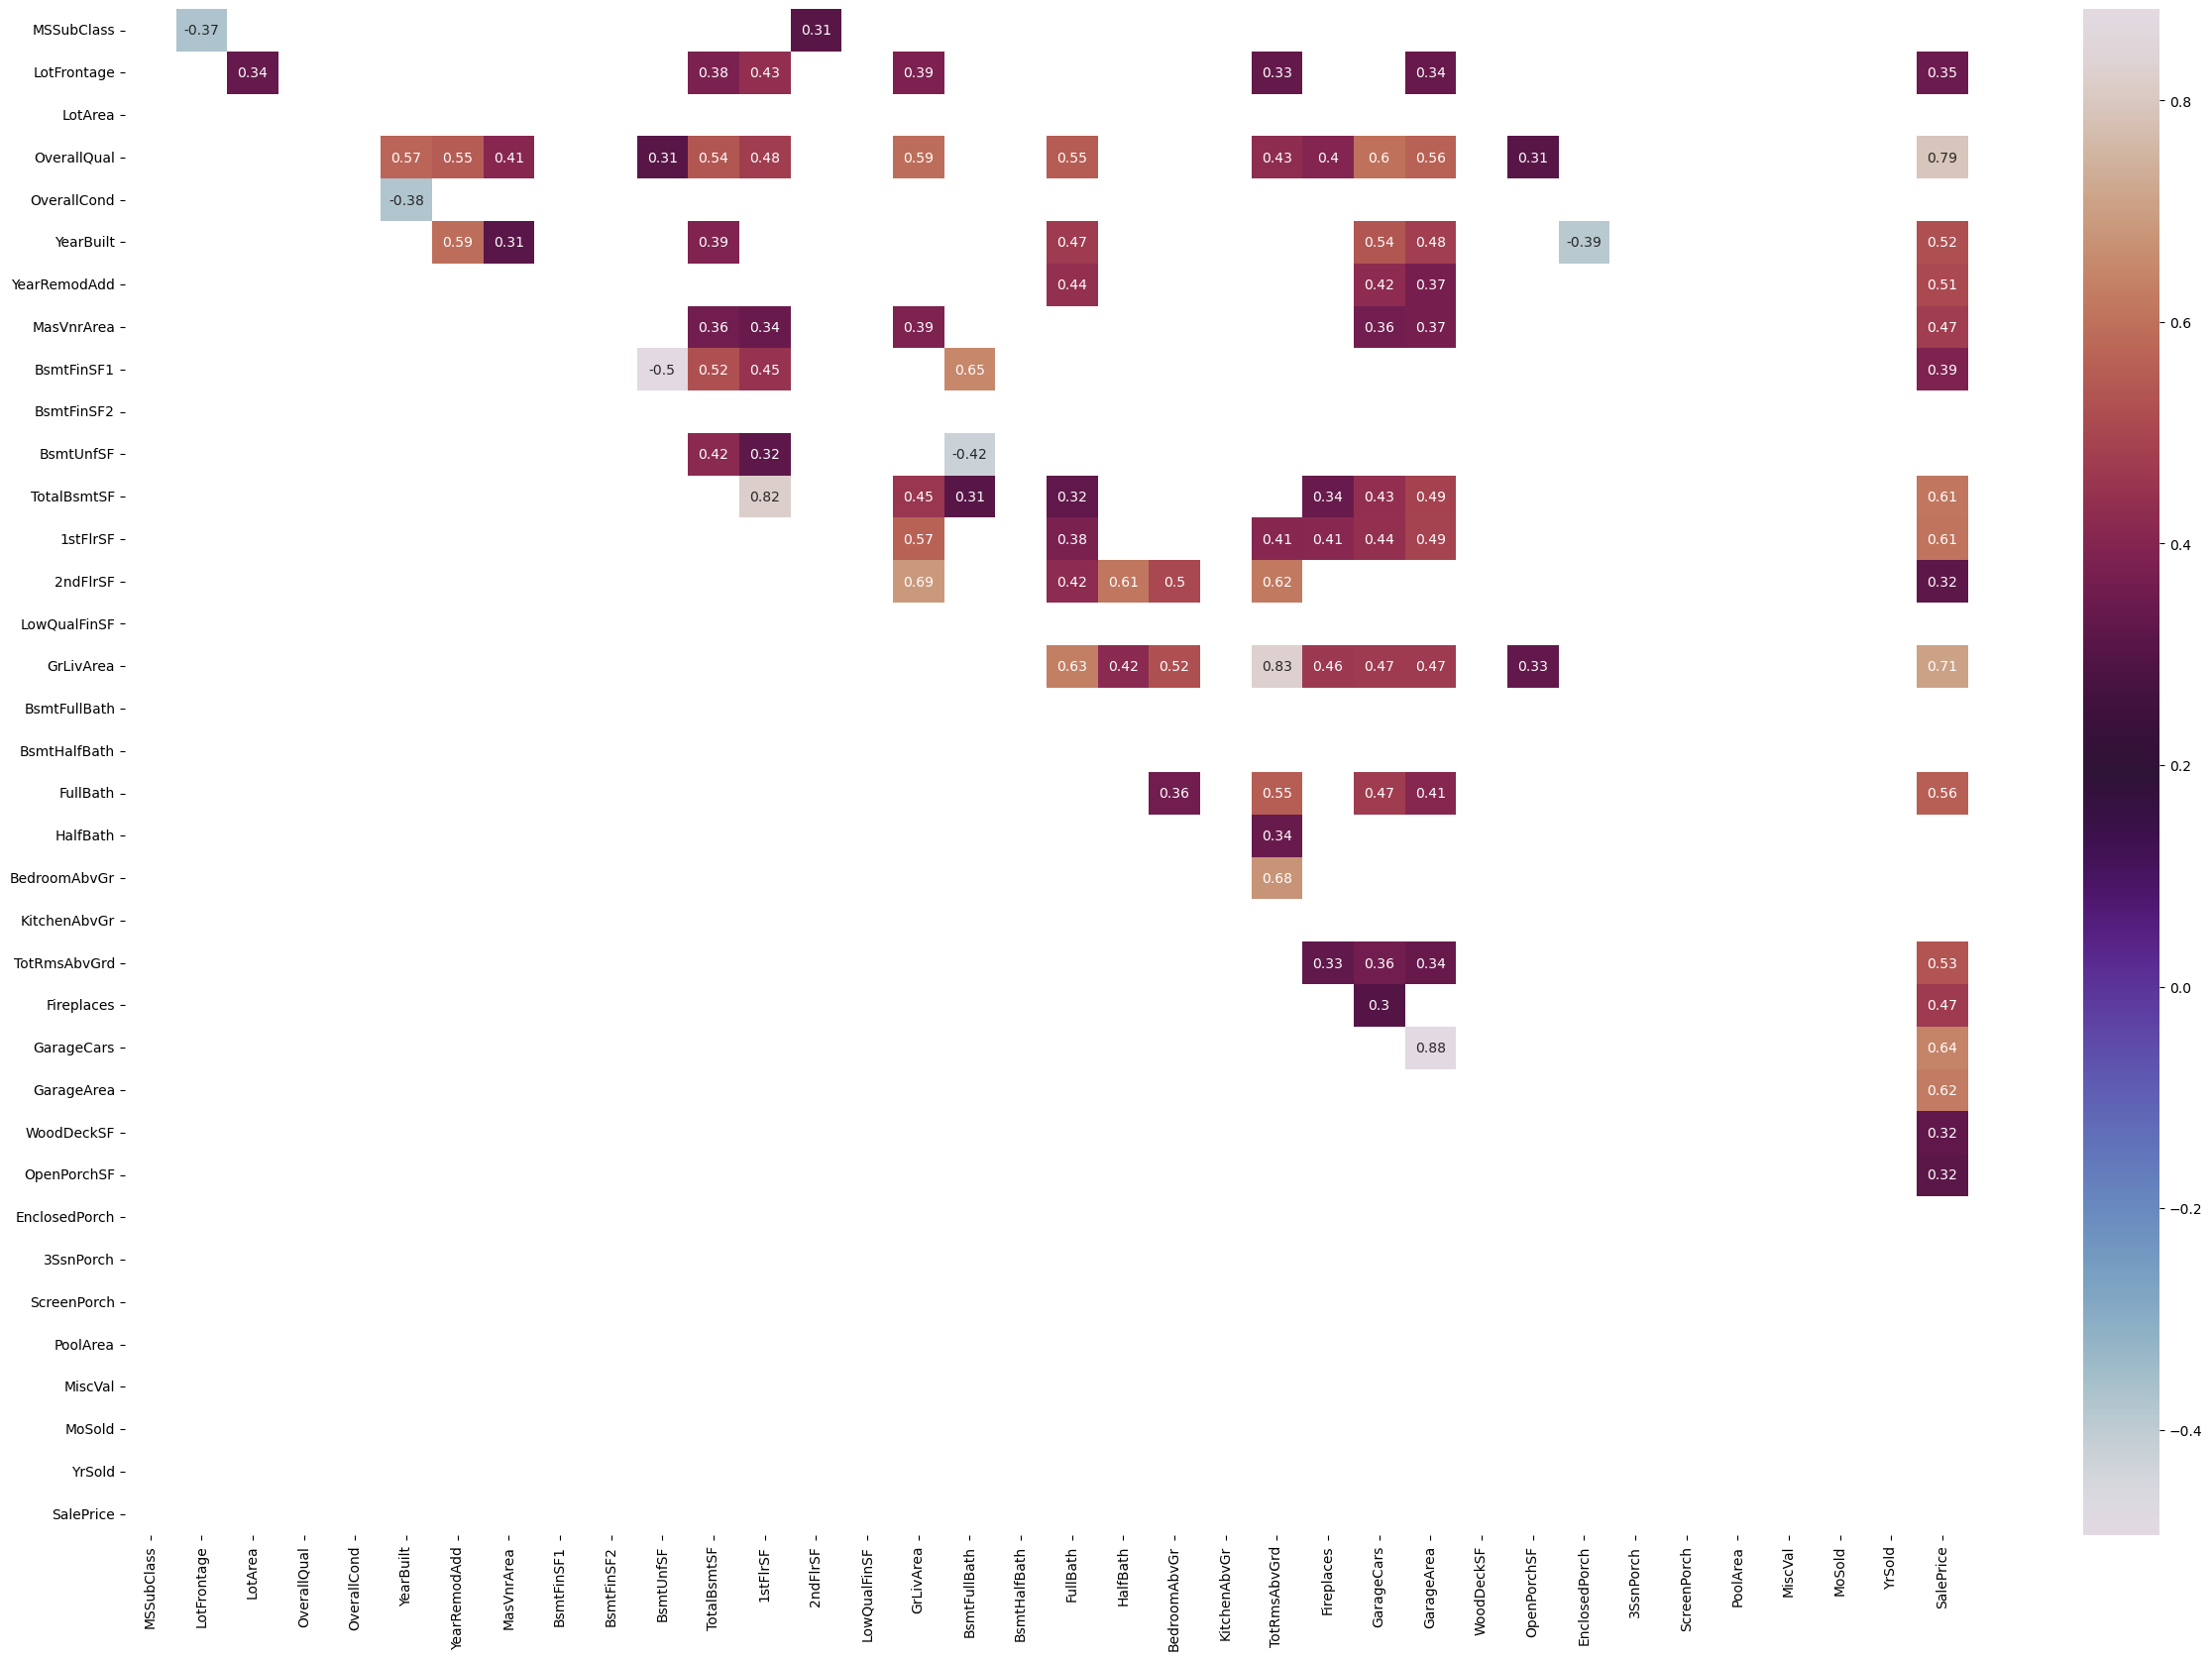

In [131]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr()[(df.corr()>0.3) | (df.corr()<-0.3)],annot=True, mask=np.tril(df.corr()), cmap='twilight')

### Numerical columns vs SalePrice

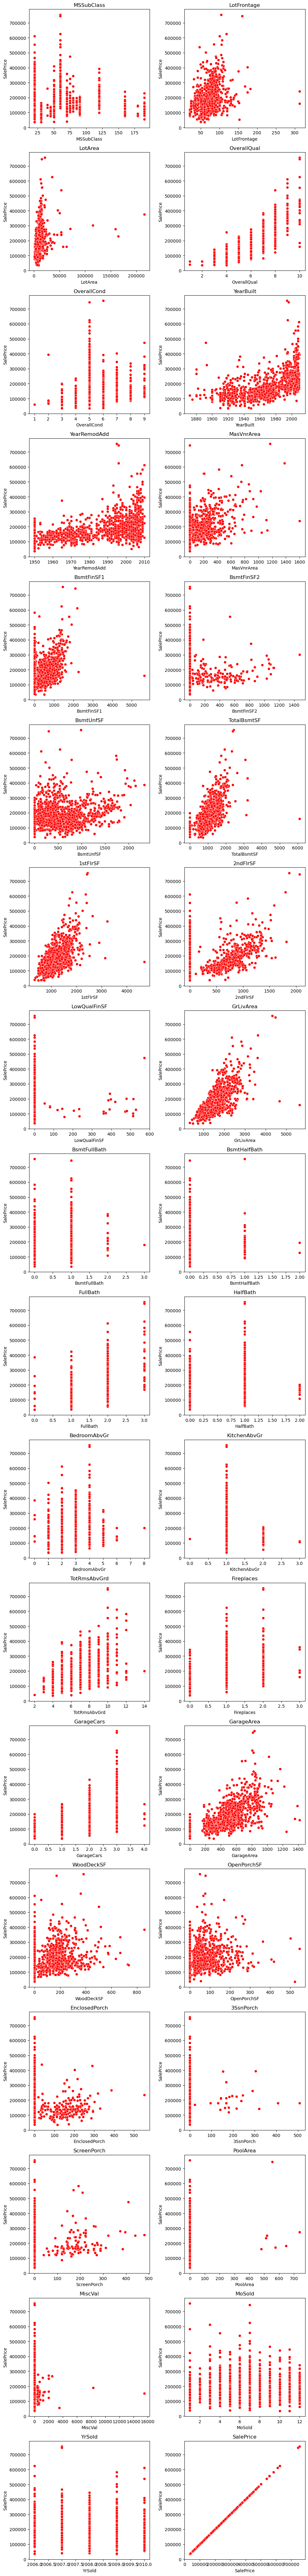

In [184]:
plt.figure(figsize=(10,100))
re=1
for i in df_num.columns:
    plt.subplot(22,2,re)
    sns.scatterplot(data=df, x=df_num[i], y=df['SalePrice'], color='red')
    plt.title(i)
    re+=1
plt.tight_layout()
plt.show()

### Categorical VS SalePrice

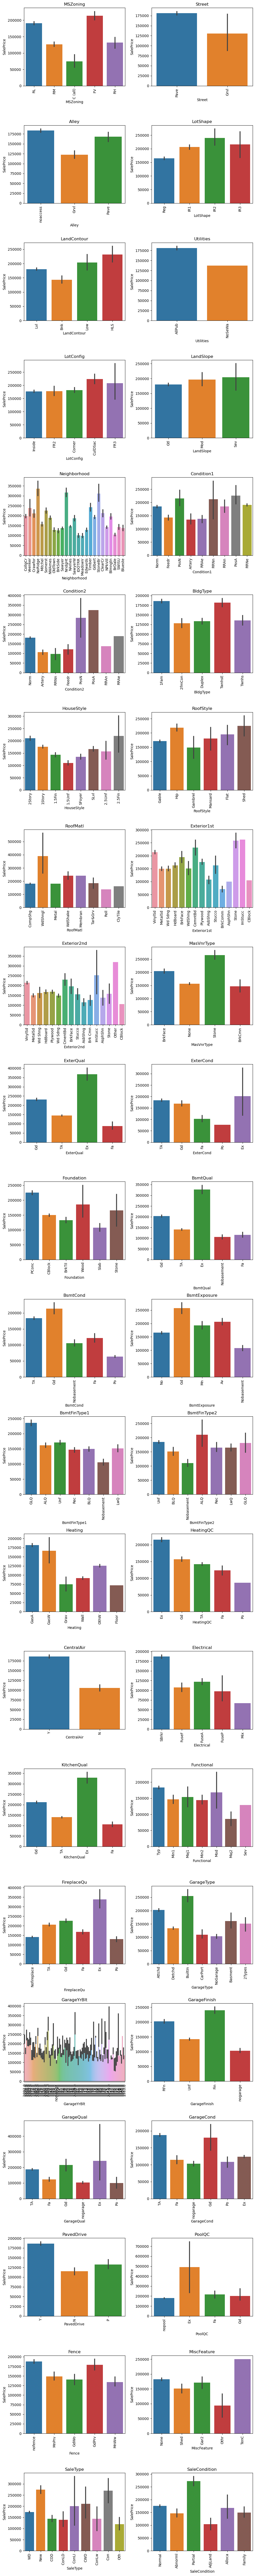

In [185]:
plt.figure(figsize=(10,100))
re=1
for i in df_cat.columns:
    plt.subplot(22,2,re)
    sns.barplot(data=df_cat,x=df_cat[i],y=df['SalePrice'])
    plt.title(i)
    plt.xticks(rotation=90)
    re+=1
plt.tight_layout()
plt.show()

# Outlier Treatment 

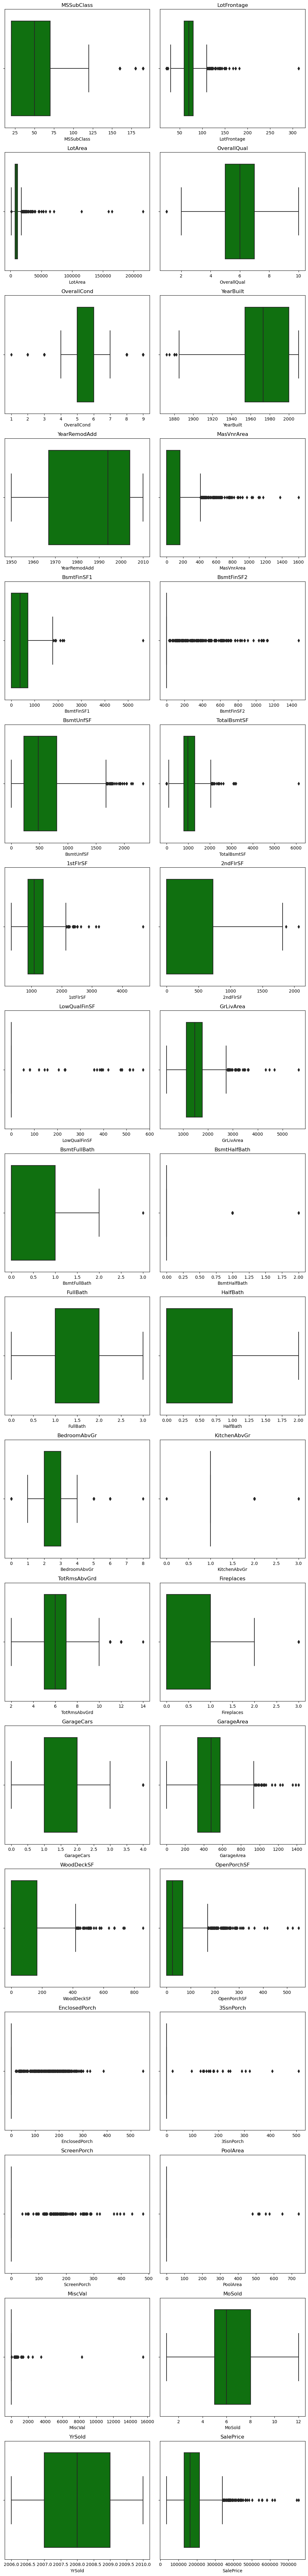

In [56]:
plt.figure(figsize=(10,100))
re=1
for i in df_num.columns:
    plt.subplot(22,2,re)
    sns.boxplot(data=df, x=df_num[i], color='green')
    plt.title(i)
    re+=1
plt.tight_layout()
plt.show()

# checking for outliers in the data 

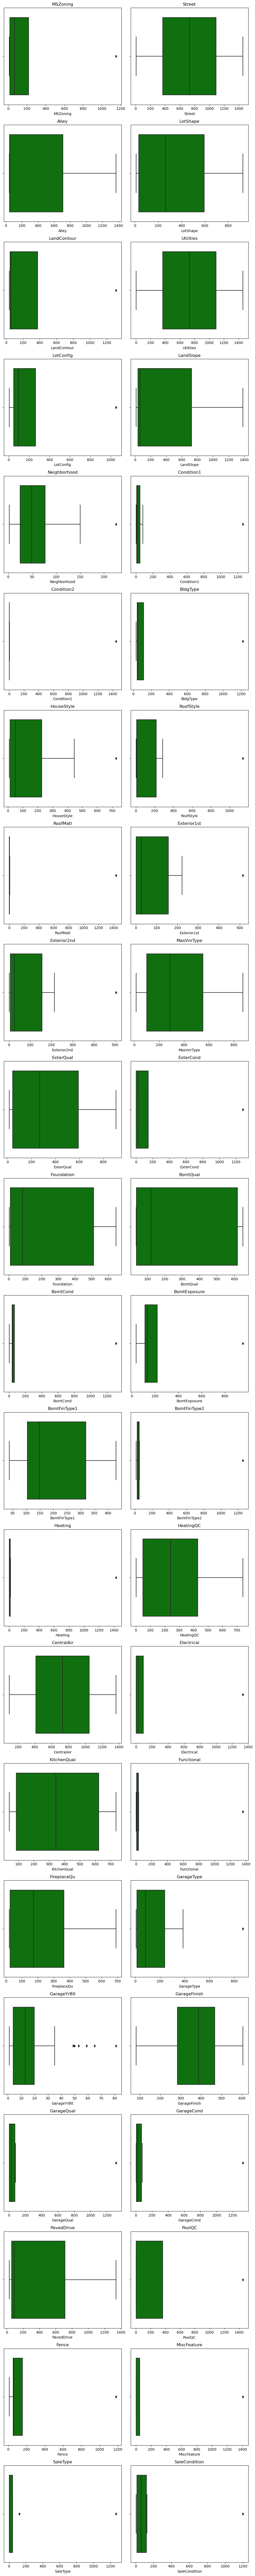

In [60]:
plt.figure(figsize=(10,100))
re=1
for i in df_cat.columns:
    plt.subplot(22,2,re)
    sns.boxplot(data=df, x=df_cat[i].value_counts(), color='green')
    plt.title(i)
    re+=1
plt.tight_layout()
plt.show()

# checking for outliers in the data 

# Description from the train data 

In [ ]:
# mssubclass has high count around 25
# lotfrontage is high around 60
# overquality and overallcondition of the houses peaks aorund 5 years 
# houses build after 2000 is the highest in the data 
# No masvnrarea houses are the highest
# Houses with no basement are high
# houses with 2 full baths are high in count 
# houses with 3 bedrooms are high in the data
# houses with one kitchen above the ground is the highest 
# houses with 6 rooms above the groud is the highest 
# houses with no fire places are high in count 
# houses with 2 garage cars is high in count 
# Garage area in houses are high around 500 
# most of the houses has no openporch and 3ssnporch
# houses with nno screenporuch, pool area, miscellanous features and fence are high in count.  
# Houses in the RL zoning is high in count 
# most of the houses in the data are in pave street type\
# high number of houses in the data has no access to alley 
# Lotshape of the houses are high in Reg follewd by IR2
# landcounter is high in lvl and most of the houses utilities belongs to allpub 
# lotconfig is high in inside category followed by corner houses 
# high number of houses are in NAmes followed by Collegr
# most of the houses belong to the buildertype of 1fam.
# housestyle is high in onestrory and roofstyle count peaks at Gable. 
# Houses with TA basement quality is the highest followed by good quality basement 
# Most of the houses has GasA heating and excellent Heating Quality 
# Most of the houses has central air 
# and the SBrKr electricl system is the famous among the houses in the data 
# Most of the houses has Ta kitchen quality followed by good. 
# and most of the houses are functional type 
# high number of houses has no fireplace 
# high number of houses has attached garage and no pool in the house 
# most of the houses has no fence 
# the hishest sale type is WD 
# and finally the highest salecondition is normal 
# price is related to lotfrontage,overallquality of the house , yearbuilt, 
   # groundlivingarea,totalrooms in the house and  garage area. 
# average saleprice of house is high with FV MSZ zoning, pave steet, no acces to alley, 
    #  IR2 lotshape, HLS landcontour, ALLpub utilities, RF3lotconfig, Sev landslpo. 
# the houses with PConc foundation has high prices. 
# the houses with excellent basement  has high prices. 
# the houses with excellent heatingquality  has high prices. 
# the prices of houses which are partially build are high. 

## treating xtest 

In [57]:
xtest=test_ini.copy()

In [58]:
xtest.isnull().sum()[xtest.isnull().sum()!=0]

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

In [60]:
xtest['MSZoning'].value_counts()

RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64

In [61]:
# impute the mszoning with mode 
xtest['MSZoning']=xtest['MSZoning'].fillna('RL')

In [62]:
xtest['Alley'].value_counts()

Grvl    70
Pave    37
Name: Alley, dtype: int64

In [63]:
xtest['Alley'] = xtest['Alley'].fillna('noaccess')

In [64]:
xtest['Utilities'].value_counts() 

AllPub    1457
Name: Utilities, dtype: int64

In [65]:
xtest['Utilities'] = xtest['Utilities'].fillna('AllPub')

In [66]:
xtest['Exterior1st'].value_counts() 

VinylSd    510
MetalSd    230
HdBoard    220
Wd Sdng    205
Plywood    113
CemntBd     65
BrkFace     37
WdShing     30
AsbShng     24
Stucco      18
BrkComm      4
AsphShn      1
CBlock       1
Name: Exterior1st, dtype: int64

In [67]:
xtest['Exterior1st'] = xtest['Exterior1st'].fillna('VinylSd')

In [68]:
xtest['Exterior2nd'].value_counts() 

VinylSd    510
MetalSd    233
HdBoard    199
Wd Sdng    194
Plywood    128
CmentBd     66
Wd Shng     43
BrkFace     22
Stucco      21
AsbShng     18
Brk Cmn     15
ImStucc      5
CBlock       2
AsphShn      1
Stone        1
Name: Exterior2nd, dtype: int64

In [69]:
xtest['Exterior2nd'] = xtest['Exterior2nd'].fillna('VinylSd')

In [70]:
xtest['MasVnrType'].value_counts()

None       878
BrkFace    434
Stone      121
BrkCmn      10
Name: MasVnrType, dtype: int64

In [71]:
xtest['MasVnrType'] = xtest['MasVnrType'].fillna('None')

In [72]:
xtest['BsmtQual'].value_counts()

TA    634
Gd    591
Ex    137
Fa     53
Name: BsmtQual, dtype: int64

In [73]:
# imputing Na with nill from analysing the description
xtest['BsmtQual']=xtest['BsmtQual'].fillna('Nobasement')

In [74]:
xtest[(xtest['BsmtQual']=='Nobasement') & (xtest['BsmtCond'].isnull())]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street     Alley  \
125   1586          30       RL         67.0     8777   Pave  noaccess   
133   1594          90       RH         60.0     7200   Pave      Pave   
269   1730          90       RL         75.0     8250   Pave  noaccess   
318   1779          20       RL         75.0     9533   Pave  noaccess   
354   1815          30       RM         50.0     5925   Pave  noaccess   
387   1848          20       RL          NaN     9000   Pave  noaccess   
388   1849          20       RL          NaN    15635   Pave  noaccess   
396   1857          70       RL        120.0    26400   Pave  noaccess   
397   1858          90       RL         64.0     7018   Pave  noaccess   
398   1859          90       RL         64.0     7018   Pave  noaccess   
400   1861          90       RL         64.0     7007   Pave  noaccess   
455   1916          30       RL        109.0    21780   Grvl  noaccess   
590   2051          20       RL         74.0     7785   Pave  noaccess   
606   2067          20       RL         71.0     8838   Pave  noaccess   
608   2069          20       RL         60.0    10122   Pave  noaccess   
660   2121          20       RM         99.0     5940   Pave  noaccess   
662   2123          30       RM          NaN     6120   Pave  noaccess   
728   2189          20       RL        123.0    47007   Pave  noaccess   
729   2190          90       RL         65.0     6012   Pave  noaccess   
730   2191          90       RL         74.0     6845   Pave  noaccess   
733   2194          50       RL         57.0     8050   Pave  noaccess   
756   2217          20       RL         80.0    14584   Pave  noaccess   
764   2225          90       RL         76.0    10260   Pave  noaccess   
927   2388          90       RL          NaN    10899   Pave  noaccess   
975   2436          20       RL         70.0     7000   Pave  noaccess   
992   2453          20       RM         52.0     8626   Pave  noaccess   
993   2454          80       RM         76.0    11800   Pave  noaccess   
1030  2491          20       RL          NaN     9000   Pave  noaccess   
1038  2499          30       RL          NaN    11515   Pave  noaccess   
1087  2548          90       RL          NaN     9555   Pave  noaccess   
1092  2553          90       RL         74.0     6882   Pave  noaccess   
1104  2565          20       RL        126.0    13108   Pave  noaccess   
1118  2579          50       RM         64.0    11067   Pave  noaccess   
1139  2600          20       RL        200.0    43500   Pave  noaccess   
1242  2703          90       RM         68.0     8927   Pave  noaccess   
1303  2764          20       RL         86.0    11650   Pave  noaccess   
1306  2767          90       RL         60.0     8544   Pave  noaccess   
1343  2804          20       RL        100.0    21370   Pave  noaccess   
1344  2805          30       RL         55.0     8250   Pave  noaccess   
1364  2825          20       RL         80.0    12048   Pave  noaccess   
1431  2892          30  C (all)         69.0    12366   Pave  noaccess   
1444  2905          20       RL        125.0    31250   Pave  noaccess   

     LotShape LandContour Utilities LotConfig LandSlope Neighborhood  \
125       Reg         Lvl    AllPub    Inside       Mod      Edwards   
133       Reg         Lvl    AllPub    Inside       Gtl        SWISU   
269       Reg         Lvl    AllPub    Inside       Gtl      SawyerW   
318       Reg         Lvl    AllPub    Inside       Gtl        NAmes   
354       Reg         Lvl    AllPub    Corner       Gtl      OldTown   
387       Reg         Lvl    AllPub    Corner       Gtl       Sawyer   
388       IR1         Lvl    AllPub   CulDSac       Gtl      Edwards   
396       Reg         Bnk    AllPub       FR2       Gtl      SawyerW   
397       Reg         Lvl    AllPub    Inside       Gtl      SawyerW   
398       Reg         Bnk    AllPub    Inside       Gtl      SawyerW   
400       Reg         Bnk    AllP

In [75]:
xtest['BsmtCond']=xtest['BsmtQual'].fillna('Nobasement')

In [76]:
xtest['BsmtExposure']

0       No
1       No
2       No
3       No
4       No
        ..
1454    No
1455    No
1456    No
1457    Av
1458    Av
Name: BsmtExposure, Length: 1459, dtype: object

In [77]:
xtest['BsmtExposure']=xtest['BsmtExposure'].fillna('No')

In [78]:
xtest['BsmtFinType1'].unique()

array(['Rec', 'ALQ', 'GLQ', 'Unf', 'BLQ', 'LwQ', nan], dtype=object)

In [79]:
xtest['BsmtFinType1']=xtest['BsmtFinType1'].fillna('Nobasement')

In [80]:
xtest['BsmtFinSF1']

0        468.0
1        923.0
2        791.0
3        602.0
4        263.0
         ...  
1454       0.0
1455     252.0
1456    1224.0
1457     337.0
1458     758.0
Name: BsmtFinSF1, Length: 1459, dtype: float64

In [81]:
xtest['BsmtFinSF1']=xtest['BsmtFinSF1'].fillna(0)

In [82]:
xtest['BsmtFinSF2']

0       144.0
1         0.0
2         0.0
3         0.0
4         0.0
        ...  
1454      0.0
1455      0.0
1456      0.0
1457      0.0
1458      0.0
Name: BsmtFinSF2, Length: 1459, dtype: float64

In [83]:
xtest['BsmtFinType2']=xtest['BsmtFinType2'].fillna(0)

In [84]:
# impute the null values of LotFrontage with median afte rgrouping by neighbourhood. 
# Using 'Neighborhood' to fill missing 'LotFrontage' values
xtest['LotFrontage'] = xtest.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [85]:
# fill the null values with median 
# MasVnrArea: Masonry veneer area in square feet
xtest['MasVnrArea']=xtest['MasVnrArea'].fillna(df['MasVnrArea'].median())

In [86]:
xtest['BsmtFinSF2']=xtest['BsmtFinSF2'].fillna(0)

In [87]:
xtest['BsmtUnfSF']=xtest['BsmtUnfSF'].fillna(xtest['BsmtUnfSF'].median())

In [88]:
xtest['TotalBsmtSF']=xtest['TotalBsmtSF'].fillna(xtest['TotalBsmtSF'].median())

In [89]:
xtest['BsmtFullBath']=xtest['BsmtFullBath'].fillna(xtest['BsmtFullBath'].median())

In [90]:
xtest['BsmtHalfBath']=xtest['BsmtHalfBath'].fillna(xtest['BsmtHalfBath'].median())

In [91]:
xtest['KitchenQual'].value_counts()

TA    757
Gd    565
Ex    105
Fa     31
Name: KitchenQual, dtype: int64

In [92]:
xtest['KitchenQual']=xtest['KitchenQual'].fillna('TA')

In [93]:
xtest['Functional'].value_counts()

Typ     1357
Min2      36
Min1      34
Mod       20
Maj1       5
Maj2       4
Sev        1
Name: Functional, dtype: int64

In [94]:
xtest['Functional']=xtest['Functional'].fillna('Typ')

In [95]:
xtest['FireplaceQu'].value_counts()

Gd    364
TA    279
Fa     41
Po     26
Ex     19
Name: FireplaceQu, dtype: int64

In [96]:
# imputing Na with nill from analysing the description
xtest['FireplaceQu']=xtest['FireplaceQu'].fillna('Nofireplace')

In [97]:
# imputing Na with nill from analysing the description
xtest['GarageType']=xtest['GarageType'].fillna('NoGarage')

In [98]:
# convert the column into categorical  
df['GarageYrBlt']=df['GarageYrBlt'].astype(object)

In [99]:
# imputing Na with nill from analysing the description
xtest['GarageYrBlt']=xtest['GarageYrBlt'].fillna('NoGarage')

In [100]:
# imputing Na with nill from analysing the description
xtest['GarageFinish']=xtest['GarageFinish'].fillna('NoGarage')

In [101]:
xtest['GarageCars']=xtest['GarageCars'].fillna(xtest['GarageCars'].median())

In [102]:
xtest['GarageArea']=xtest['GarageArea'].fillna(0)

In [103]:
# imputing Na with nill from analysing the description
xtest['GarageQual']=xtest['GarageQual'].fillna('NoGarage')

In [104]:
# imputing Na with nill from analysing the description
xtest['GarageCond']=xtest['GarageCond'].fillna('NoGarage')

In [105]:
xtest['PoolQC']=xtest['PoolQC'].fillna('nopool')

In [106]:
xtest['Fence']=xtest['Fence'].fillna('nofence')

In [107]:
xtest['MiscFeature']=xtest['MiscFeature'].fillna('None')

In [108]:
xtest['SaleType'].value_counts()

WD       1258
New       117
COD        44
ConLD      17
CWD         8
Oth         4
ConLI       4
Con         3
ConLw       3
Name: SaleType, dtype: int64

In [109]:
xtest['SaleType']=xtest['SaleType'].fillna('WD')

In [110]:
xtest.isnull().sum()[xtest.isnull().sum()!=0]

Series([], dtype: int64)

## get the final train data 

In [111]:
a=df.skew()
b=a[(a>1.5) | (a<-1.5)]
b

LotFrontage       2.212959
LotArea          12.207688
MasVnrArea        2.677616
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
TotalBsmtSF       1.524255
LowQualFinSF      9.011341
BsmtHalfBath      4.103403
KitchenAbvGr      4.488397
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
SalePrice         1.882876
dtype: float64

In [150]:
# Log transformation for columns with positive skewness
train= df.drop('SalePrice', axis=1)
for i in b.index:
    train[i] = np.log1p(df[i])

In [151]:
train

Id  MSSubClass MSZoning  LotFrontage   LotArea Street     Alley  \
0        1          60       RL         65.0  9.042040   Pave  noaccess   
1        2          20       RL         80.0  9.169623   Pave  noaccess   
2        3          60       RL         68.0  9.328212   Pave  noaccess   
3        4          70       RL         60.0  9.164401   Pave  noaccess   
4        5          60       RL         84.0  9.565284   Pave  noaccess   
...    ...         ...      ...          ...       ...    ...       ...   
1455  1456          60       RL         62.0  8.976894   Pave  noaccess   
1456  1457          20       RL         85.0  9.486152   Pave  noaccess   
1457  1458          70       RL         66.0  9.109746   Pave  noaccess   
1458  1459          20       RL         68.0  9.181735   Pave  noaccess   
1459  1460          20       RL         75.0  9.204121   Pave  noaccess   

     LotShape LandContour Utilities LotConfig LandSlope Neighborhood  \
0         Reg         Lvl    AllPub    Inside       Gtl      CollgCr   
1         Reg         Lvl    AllPub       FR2       Gtl      Veenker   
2         IR1         Lvl    AllPub    Inside       Gtl      CollgCr   
3         IR1         Lvl    AllPub    Corner       Gtl      Crawfor   
4         IR1         Lvl    AllPub       FR2       Gtl      NoRidge   
...       ...         ...       ...       ...       ...          ...   
1455      Reg         Lvl    AllPub    Inside       Gtl      Gilbert   
1456      Reg         Lvl    AllPub    Inside       Gtl       NWAmes   
1457      Reg         Lvl    AllPub    Inside       Gtl      Crawfor   
1458      Reg         Lvl    AllPub    Inside       Gtl        NAmes   
1459      Reg         Lvl    AllPub    Inside       Gtl      Edwards   

     Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  \
0          Norm       Norm     1Fam     2Story            7            5   
1         Feedr       Norm     1Fam     1Story            6            8   
2          Norm       Norm     1Fam     2Story            7            5   
3          Norm       Norm     1Fam     2Story            7            5   
4          Norm       Norm     1Fam     2Story            8            5   
...         ...        ...      ...        ...          ...          ...   
1455       Norm       Norm     1Fam     2Story            6            5   
1456       Norm       Norm     1Fam     1Story            6            6   
1457       Norm       Norm     1Fam     2Story            7            9   
1458       Norm       Norm     1Fam     1Story            5            6   
1459       Norm       Norm     1Fam     1Story            5            6   

      YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  \
0          2003          2003     Gable  CompShg     VinylSd     VinylSd   
1          1976          1976     Gable  CompShg     MetalSd     MetalSd   
2          2001          2002     Gable  CompShg     VinylSd     VinylSd   
3          1915          1970     Gable  CompShg     Wd Sdng     Wd Shng   
4          2000          2000     Gable  CompShg     VinylSd     VinylSd   
...         ...           ...       ...      ...         ...         ...   
1455       1999          2000     Gable  CompShg     VinylSd     VinylSd   
1456       1978          1988     Gable  CompShg     Plywood     Plywood   
1457       1941          2006     Gable  CompShg     CemntBd     CmentBd   
1458       1950          1996       Hip  CompShg     MetalSd     MetalSd   
1459       1965          1965     Gable  CompShg     HdBoard     HdBoard   

     MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0       BrkFace    5.283204        Gd        TA      PConc       Gd       TA   
1          None    0.000000        TA        TA     CBlock       Gd       TA   
2       BrkFace    5.093750        Gd        TA      PConc       Gd       TA   
3          None    0.000000        TA        TA     BrkTil       TA       Gd   
4       BrkFace 

## get the final test data 

In [152]:
a=xtest.skew()
b=a[(a>1.5) | (a<-1.5)]
b

LotArea           3.115217
MasVnrArea        2.549569
BsmtFinSF2        4.042954
1stFlrSF          1.558195
LowQualFinSF     16.167254
BsmtHalfBath      3.782976
KitchenAbvGr      4.079055
WoodDeckSF        2.130760
OpenPorchSF       2.687779
EnclosedPorch     4.669172
3SsnPorch        12.524216
ScreenPorch       3.788244
PoolArea         20.196888
MiscVal          20.075188
dtype: float64

In [153]:
test = xtest.copy()
for i in b.index:
    test[i] = np.log1p(df[i])

In [154]:
test

Id  MSSubClass MSZoning  LotFrontage   LotArea Street     Alley  \
0     1461          20       RH         80.0  9.042040   Pave  noaccess   
1     1462          20       RL         81.0  9.169623   Pave  noaccess   
2     1463          60       RL         74.0  9.328212   Pave  noaccess   
3     1464          60       RL         78.0  9.164401   Pave  noaccess   
4     1465         120       RL         43.0  9.565284   Pave  noaccess   
...    ...         ...      ...          ...       ...    ...       ...   
1454  2915         160       RM         21.0  8.922792   Pave  noaccess   
1455  2916         160       RM         21.0  8.976894   Pave  noaccess   
1456  2917          20       RL        160.0  9.486152   Pave  noaccess   
1457  2918          85       RL         62.0  9.109746   Pave  noaccess   
1458  2919          60       RL         74.0  9.181735   Pave  noaccess   

     LotShape LandContour Utilities LotConfig LandSlope Neighborhood  \
0         Reg         Lvl    AllPub    Inside       Gtl        NAmes   
1         IR1         Lvl    AllPub    Corner       Gtl        NAmes   
2         IR1         Lvl    AllPub    Inside       Gtl      Gilbert   
3         IR1         Lvl    AllPub    Inside       Gtl      Gilbert   
4         IR1         HLS    AllPub    Inside       Gtl      StoneBr   
...       ...         ...       ...       ...       ...          ...   
1454      Reg         Lvl    AllPub    Inside       Gtl      MeadowV   
1455      Reg         Lvl    AllPub    Inside       Gtl      MeadowV   
1456      Reg         Lvl    AllPub    Inside       Gtl      Mitchel   
1457      Reg         Lvl    AllPub    Inside       Gtl      Mitchel   
1458      Reg         Lvl    AllPub    Inside       Mod      Mitchel   

     Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  \
0         Feedr       Norm     1Fam     1Story            5            6   
1          Norm       Norm     1Fam     1Story            6            6   
2          Norm       Norm     1Fam     2Story            5            5   
3          Norm       Norm     1Fam     2Story            6            6   
4          Norm       Norm   TwnhsE     1Story            8            5   
...         ...        ...      ...        ...          ...          ...   
1454       Norm       Norm    Twnhs     2Story            4            7   
1455       Norm       Norm   TwnhsE     2Story            4            5   
1456       Norm       Norm     1Fam     1Story            5            7   
1457       Norm       Norm     1Fam     SFoyer            5            5   
1458       Norm       Norm     1Fam     2Story            7            5   

      YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  \
0          1961          1961     Gable  CompShg     VinylSd     VinylSd   
1          1958          1958       Hip  CompShg     Wd Sdng     Wd Sdng   
2          1997          1998     Gable  CompShg     VinylSd     VinylSd   
3          1998          1998     Gable  CompShg     VinylSd     VinylSd   
4          1992          1992     Gable  CompShg     HdBoard     HdBoard   
...         ...           ...       ...      ...         ...         ...   
1454       1970          1970     Gable  CompShg     CemntBd     CmentBd   
1455       1970          1970     Gable  CompShg     CemntBd     CmentBd   
1456       1960          1996     Gable  CompShg     VinylSd     VinylSd   
1457       1992          1992     Gable  CompShg     HdBoard     Wd Shng   
1458       1993          1994     Gable  CompShg     HdBoard     HdBoard   

     MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0          None    5.283204        TA        TA     CBlock       TA       TA   
1       BrkFace    0.000000        TA        TA     CBlock       TA       TA   
2          None    5.093750        TA        TA      PConc       Gd       Gd   
3       BrkFace    0.000000        TA        TA      PConc       TA       TA   
4          None 

# label encoding train and test data

In [155]:
from sklearn.preprocessing import LabelEncoder

In [156]:
concated_df= pd.concat([train,test])
concated_df

Id  MSSubClass MSZoning  LotFrontage   LotArea Street     Alley  \
0        1          60       RL         65.0  9.042040   Pave  noaccess   
1        2          20       RL         80.0  9.169623   Pave  noaccess   
2        3          60       RL         68.0  9.328212   Pave  noaccess   
3        4          70       RL         60.0  9.164401   Pave  noaccess   
4        5          60       RL         84.0  9.565284   Pave  noaccess   
...    ...         ...      ...          ...       ...    ...       ...   
1454  2915         160       RM         21.0  8.922792   Pave  noaccess   
1455  2916         160       RM         21.0  8.976894   Pave  noaccess   
1456  2917          20       RL        160.0  9.486152   Pave  noaccess   
1457  2918          85       RL         62.0  9.109746   Pave  noaccess   
1458  2919          60       RL         74.0  9.181735   Pave  noaccess   

     LotShape LandContour Utilities LotConfig LandSlope Neighborhood  \
0         Reg         Lvl    AllPub    Inside       Gtl      CollgCr   
1         Reg         Lvl    AllPub       FR2       Gtl      Veenker   
2         IR1         Lvl    AllPub    Inside       Gtl      CollgCr   
3         IR1         Lvl    AllPub    Corner       Gtl      Crawfor   
4         IR1         Lvl    AllPub       FR2       Gtl      NoRidge   
...       ...         ...       ...       ...       ...          ...   
1454      Reg         Lvl    AllPub    Inside       Gtl      MeadowV   
1455      Reg         Lvl    AllPub    Inside       Gtl      MeadowV   
1456      Reg         Lvl    AllPub    Inside       Gtl      Mitchel   
1457      Reg         Lvl    AllPub    Inside       Gtl      Mitchel   
1458      Reg         Lvl    AllPub    Inside       Mod      Mitchel   

     Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  \
0          Norm       Norm     1Fam     2Story            7            5   
1         Feedr       Norm     1Fam     1Story            6            8   
2          Norm       Norm     1Fam     2Story            7            5   
3          Norm       Norm     1Fam     2Story            7            5   
4          Norm       Norm     1Fam     2Story            8            5   
...         ...        ...      ...        ...          ...          ...   
1454       Norm       Norm    Twnhs     2Story            4            7   
1455       Norm       Norm   TwnhsE     2Story            4            5   
1456       Norm       Norm     1Fam     1Story            5            7   
1457       Norm       Norm     1Fam     SFoyer            5            5   
1458       Norm       Norm     1Fam     2Story            7            5   

      YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  \
0          2003          2003     Gable  CompShg     VinylSd     VinylSd   
1          1976          1976     Gable  CompShg     MetalSd     MetalSd   
2          2001          2002     Gable  CompShg     VinylSd     VinylSd   
3          1915          1970     Gable  CompShg     Wd Sdng     Wd Shng   
4          2000          2000     Gable  CompShg     VinylSd     VinylSd   
...         ...           ...       ...      ...         ...         ...   
1454       1970          1970     Gable  CompShg     CemntBd     CmentBd   
1455       1970          1970     Gable  CompShg     CemntBd     CmentBd   
1456       1960          1996     Gable  CompShg     VinylSd     VinylSd   
1457       1992          1992     Gable  CompShg     HdBoard     Wd Shng   
1458       1993          1994     Gable  CompShg     HdBoard     HdBoard   

     MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0       BrkFace    5.283204        Gd        TA      PConc       Gd       TA   
1          None    0.000000        TA        TA     CBlock       Gd       TA   
2       BrkFace    5.093750        Gd        TA      PConc       Gd       TA   
3          None    0.000000        TA        TA     BrkTil       TA       Gd   
4       BrkFace 

In [157]:

# Identify columns with a mix of float and string values
mixed_type_columns = concated_df.select_dtypes(include=['float', 'object']).columns

# Convert columns with a mix of float and string values to strings
for column in mixed_type_columns:
    concated_df[column] = concated_df[column].astype(str)

# Apply label encoding
label_encoder = LabelEncoder()

for column in mixed_type_columns:
    concated_df[column] = label_encoder.fit_transform(concated_df[column])


In [158]:
concated_df

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  \
0        1          60         3           95      365       1      2   
1        2          20         3          114      536       1      2   
2        3          60         3          101      740       1      2   
3        4          70         3           88      527       1      2   
4        5          60         3          118      963       1      2   
...    ...         ...       ...          ...      ...     ...    ...   
1454  2915         160         4           51      265       1      2   
1455  2916         160         4           51      305       1      2   
1456  2917          20         3           45      904       1      2   
1457  2918          85         3           91      453       1      2   
1458  2919          60         3          108      543       1      2   

      LotShape  LandContour  Utilities  LotConfig  LandSlope  Neighborhood  \
0            3            3          0          4          0             5   
1            3            3          0          2          0            24   
2            0            3          0          4          0             5   
3            0            3          0          0          0             6   
4            0            3          0          2          0            15   
...        ...          ...        ...        ...        ...           ...   
1454         3            3          0          4          0            10   
1455         3            3          0          4          0            10   
1456         3            3          0          4          0            11   
1457         3            3          0          4          0            11   
1458         3            3          0          4          1            11   

      Condition1  Condition2  BldgType  HouseStyle  OverallQual  OverallCond  \
0              2           2         0           5            7            5   
1              1           2         0           2            6            8   
2              2           2         0           5            7            5   
3              2           2         0           5            7            5   
4              2           2         0           5            8            5   
...          ...         ...       ...         ...          ...          ...   
1454           2           2         3           5            4            7   
1455           2           2         4           5            4            5   
1456           2           2         0           2            5            7   
1457           2           2         0           6            5            5   
1458           2           2         0           5            7            5   

      YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  \
0          2003          2003          1         1           12           13   
1          1976          1976          1         1            8            8   
2          2001          2002          1         1           12           13   
3          1915          1970          1         1           13           15   
4          2000          2000          1         1           12           13   
...         ...           ...        ...       ...          ...          ...   
1454       1970          1970          1         1            5            5   
1455       1970          1970          1         1            5            5   
1456       1960          1996          1         1           12           13   
1457       1992          1992          1         1            6           15   
1458       1993          1994          1         1            6            6   

      MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  \
0              1         128          2          4           2         2   
1              2           0          3          4           1         2   
2              1         104          2     

### get the xtrain,ytrain and xtest

In [169]:
X_train=concated_df.iloc[ :1460]
X_train

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  \
0        1          60         3           95      365       1      2   
1        2          20         3          114      536       1      2   
2        3          60         3          101      740       1      2   
3        4          70         3           88      527       1      2   
4        5          60         3          118      963       1      2   
...    ...         ...       ...          ...      ...     ...    ...   
1455  1456          60         3           91      305       1      2   
1456  1457          20         3          119      904       1      2   
1457  1458          70         3           97      453       1      2   
1458  1459          20         3          101      543       1      2   
1459  1460          20         3          109      570       1      2   

      LotShape  LandContour  Utilities  LotConfig  LandSlope  Neighborhood  \
0            3            3          0          4          0             5   
1            3            3          0          2          0            24   
2            0            3          0          4          0             5   
3            0            3          0          0          0             6   
4            0            3          0          2          0            15   
...        ...          ...        ...        ...        ...           ...   
1455         3            3          0          4          0             8   
1456         3            3          0          4          0            14   
1457         3            3          0          4          0             6   
1458         3            3          0          4          0            12   
1459         3            3          0          4          0             7   

      Condition1  Condition2  BldgType  HouseStyle  OverallQual  OverallCond  \
0              2           2         0           5            7            5   
1              1           2         0           2            6            8   
2              2           2         0           5            7            5   
3              2           2         0           5            7            5   
4              2           2         0           5            8            5   
...          ...         ...       ...         ...          ...          ...   
1455           2           2         0           5            6            5   
1456           2           2         0           2            6            6   
1457           2           2         0           5            7            9   
1458           2           2         0           2            5            6   
1459           2           2         0           2            5            6   

      YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  \
0          2003          2003          1         1           12           13   
1          1976          1976          1         1            8            8   
2          2001          2002          1         1           12           13   
3          1915          1970          1         1           13           15   
4          2000          2000          1         1           12           13   
...         ...           ...        ...       ...          ...          ...   
1455       1999          2000          1         1           12           13   
1456       1978          1988          1         1            9           10   
1457       1941          2006          1         1            5            5   
1458       1950          1996          3         1            8            8   
1459       1965          1965          1         1            6            6   

      MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  \
0              1         128          2          4           2         2   
1              2           0          3          4           1         2   
2              1         104          2     

In [170]:
X_test=concated_df.iloc[1460:]
X_test

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  \
0     1461          20         2          114      365       1      2   
1     1462          20         3          115      536       1      2   
2     1463          60         3          108      740       1      2   
3     1464          60         3          112      527       1      2   
4     1465         120         3           71      963       1      2   
...    ...         ...       ...          ...      ...     ...    ...   
1454  2915         160         4           51      265       1      2   
1455  2916         160         4           51      305       1      2   
1456  2917          20         3           45      904       1      2   
1457  2918          85         3           91      453       1      2   
1458  2919          60         3          108      543       1      2   

      LotShape  LandContour  Utilities  LotConfig  LandSlope  Neighborhood  \
0            3            3          0          4          0            12   
1            0            3          0          0          0            12   
2            0            3          0          4          0             8   
3            0            3          0          4          0             8   
4            0            1          0          4          0            22   
...        ...          ...        ...        ...        ...           ...   
1454         3            3          0          4          0            10   
1455         3            3          0          4          0            10   
1456         3            3          0          4          0            11   
1457         3            3          0          4          0            11   
1458         3            3          0          4          1            11   

      Condition1  Condition2  BldgType  HouseStyle  OverallQual  OverallCond  \
0              1           2         0           2            5            6   
1              2           2         0           2            6            6   
2              2           2         0           5            5            5   
3              2           2         0           5            6            6   
4              2           2         4           2            8            5   
...          ...         ...       ...         ...          ...          ...   
1454           2           2         3           5            4            7   
1455           2           2         4           5            4            5   
1456           2           2         0           2            5            7   
1457           2           2         0           6            5            5   
1458           2           2         0           5            7            5   

      YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  \
0          1961          1961          1         1           12           13   
1          1958          1958          3         1           13           14   
2          1997          1998          1         1           12           13   
3          1998          1998          1         1           12           13   
4          1992          1992          1         1            6            6   
...         ...           ...        ...       ...          ...          ...   
1454       1970          1970          1         1            5            5   
1455       1970          1970          1         1            5            5   
1456       1960          1996          1         1           12           13   
1457       1992          1992          1         1            6           15   
1458       1993          1994          1         1            6            6   

      MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  \
0              2         128          3          4           1         4   
1              1           0          3          4           1         4   
2              2         104          3     

In [171]:
x_train=X_train.drop('Id', axis=1)

In [172]:
y_train=df["SalePrice"]

In [173]:
x_test=X_test.drop('Id', axis=1)

In [174]:
x_train.shape,x_test.shape,y_train.shape

((1460, 79), (1459, 79), (1460,))

# Modelling

In [165]:
# IMPORT THE LIBRARIES 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.preprocessing import PowerTransformer,StandardScaler,MinMaxScaler,RobustScaler,LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score
from sklearn.model_selection import train_test_split,cross_val_score,LeaveOneOut,GridSearchCV ,RandomizedSearchCV
from sklearn.feature_selection import RFE
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import Lasso,Ridge,ElasticNet,LinearRegression,SGDRegressor
from statsmodels.stats.diagnostic import het_breuschpagan
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier


## Linear Regression

In [167]:
lr=LinearRegression()

In [175]:
lr_model = lr.fit(x_train,y_train)
ypred_train_lr = lr_model.predict(x_train)
ypred_test_lr = lr_model.predict(x_test)

r2_train_lr=r2_score(y_train,ypred_train_lr)


print("R2 Train :", r2_train_lr)


R2 Train : 0.855566132526679


In [176]:
# appending the scores to a dataframe called  D for the final analysis 
D=pd.DataFrame()
D['SCORE']=[ 'r2 train']
D['LINEAR REGRESSION']=[r2_train_lr]

## ridge

In [177]:
tuned_paramaters = [{'alpha':[1e-15, 1e-10, 1e-8, 1e-4,1e-3, 1e-2, 0.1, 1, 5, 10, 20, 40, 60, 80, 100]}]
 
# initiate the ridge regression model
ridge = Ridge()


ridge_grid = GridSearchCV(estimator = ridge, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

# fit the model on X_train and y_train using fit()
ridge_grid.fit(x_train, y_train)

# get the best parameters
print('Best parameters for Ridge Regression: ', ridge_grid.best_params_, '\n')

Best parameters for Ridge Regression:  {'alpha': 80} 



In [178]:
# use Ridge() to perform ridge regression

ridge_model = Ridge(alpha = 80, max_iter = 500)

# fit the model on train set
ridge_model.fit(x_train, y_train)


Ridge(alpha=80, max_iter=500)

In [179]:
# get predicted values

ypred_train_ridge = ridge_model.predict(x_train)
ypred_test_ridge = ridge_model.predict(x_test)


In [180]:

r2_train_ridge=r2_score(y_train,ypred_train_ridge)

print("R2 Train ridge2:", r2_train_ridge)


R2 Train ridge2: 0.8530961427680424


In [181]:
D['ridge']=[ r2_train_ridge]

# 3. LASSO

In [182]:
tuned_paramaters = [{'alpha':[1e-15, 1e-10, 1e-8, 1e-4,1e-3, 1e-2, 0.1, 1, 5, 10, 20, 40, 60, 80, 100]}]
 
# initiate the LASSO regression model
lasso = Lasso()


lasso_grid = GridSearchCV(estimator = lasso, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

# fit the model on X_train and y_train using fit()
lasso_grid.fit(x_train, y_train)

# get the best parameters
print('Best parameters for Ridge Regression: ', lasso_grid.best_params_, '\n')


Best parameters for Ridge Regression:  {'alpha': 100} 



In [183]:
lasso_model = Lasso(alpha = 100, max_iter = 500)

In [184]:
# fit the model 
lasso_model.fit(x_train, y_train)

Lasso(alpha=100, max_iter=500)

In [185]:
# get the predicted values
ypred_train_LASSO = lasso_model.predict(x_train)
ypred_test_LASSO = lasso_model.predict(x_test)

In [186]:
r2_train_lasso=r2_score(y_train,ypred_train_LASSO)

print("R2 Train :", r2_train_lasso)


R2 Train : 0.8542012472027561


In [187]:
D[' lasso']=[r2_train_lasso]

# ELASTIC NET

In [188]:
tuned_paramaters = [{'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20, 40, 60],
                      'l1_ratio':[0.0001, 0.0002, 0.001, 0.01, 0.1, 0.2]}]

# initiate the elastic net regression model  
enet = ElasticNet()

# use GridSearchCV() to find the optimal value of alpha and l1_ratio
# estimator: pass the elastic net regression model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
enet_grid = GridSearchCV(estimator = enet, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

# fit the model on X_train and y_train using fit()
enet_grid.fit(x_train, y_train)

# get the best parameters
print('Best parameters for Elastic Net Regression: ', enet_grid.best_params_, '\n')



Best parameters for Elastic Net Regression:  {'alpha': 0.1, 'l1_ratio': 0.2} 



In [189]:
elasticnet_model = ElasticNet(alpha = 0.1, l1_ratio=0.2, max_iter = 500)

In [190]:
# fit the model 
elasticnet_model .fit(x_train, y_train)

ElasticNet(alpha=0.1, l1_ratio=0.2, max_iter=500)

In [191]:
# get the predicted values 
ypred_train_ENET = elasticnet_model.predict(x_train)
ypred_test_ENET = elasticnet_model.predict(x_test)

In [192]:
r2_train_enet=r2_score(y_train,ypred_train_ENET)

print("R2 Train _enet:", r2_train_enet)


R2 Train _enet: 0.8522350723281664


In [193]:

D[' enet']=[r2_train_enet]

# FEATURE SELECTION AND REBUILDING THE MODEL

### forward feature selection

In [194]:
lr= LinearRegression()

lr_forward = sfs(estimator=lr, k_features ='best', forward=True,
                     verbose=2, scoring='r2')


sfs_forward = lr_forward.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  79 out of  79 | elapsed:    1.1s finished

[2023-11-09 16:41:03] Features: 1/79 -- score: 0.62460970757036[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  78 out of  78 | elapsed:    1.0s finished

[2023-11-09 16:41:04] Features: 2/79 -- score: 0.7096349761076601[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  77 out of  77 | elapsed:    1.0s finished

[2023-11-09 16:41:05] Features: 3/79 -- score: 0.7375577833829958[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  51 out of  51 | elapsed:   47.4s finished

[2023-11-09 16:47:13] Features: 29/79 -- score: 0.8309183759356857[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   45.2s finished

[2023-11-09 16:47:59] Features: 30/79 -- score: 0.8311939901788523[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  49 out of  49 | elapsed:   23.5s finished

[2023-11-09 16:48:22] Features: 31/79 -- score: 0.8313787287223061[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:   33.9s finished

[2023-11-09 17:02:13] Features: 57/79 -- score: 0.83025648074855[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:   32.6s finished

[2023-11-09 17:02:46] Features: 58/79 -- score: 0.829993259161102[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:   27.1s finished

[2023-11-09 17:03:13] Features: 59/79 -- score: 0.8297002493515784[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  2

In [195]:
sfs_forward.k_feature_names_

('MSSubClass',
 'LotFrontage',
 'LotArea',
 'Alley',
 'LandContour',
 'Utilities',
 'LandSlope',
 'Neighborhood',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'HeatingQC',
 'Electrical',
 '1stFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'KitchenAbvGr',
 'KitchenQual',
 'Functional',
 'Fireplaces',
 'GarageType',
 'GarageCars',
 'GarageCond',
 'WoodDeckSF',
 'ScreenPorch',
 'MiscFeature',
 'YrSold',
 'SaleCondition')

In [196]:
x_trainf=x_train.loc[:,sfs_forward.k_feature_names_]

In [197]:
x_trainf

MSSubClass  LotFrontage  LotArea  Alley  LandContour  Utilities  \
0             60           95      365      2            3          0   
1             20          114      536      2            3          0   
2             60          101      740      2            3          0   
3             70           88      527      2            3          0   
4             60          118      963      2            3          0   
...          ...          ...      ...    ...          ...        ...   
1455          60           91      305      2            3          0   
1456          20          119      904      2            3          0   
1457          70           97      453      2            3          0   
1458          20          101      543      2            3          0   
1459          20          109      570      2            3          0   

      LandSlope  Neighborhood  BldgType  HouseStyle  OverallQual  OverallCond  \
0             0             5         0           5            7            5   
1             0            24         0           2            6            8   
2             0             5         0           5            7            5   
3             0             6         0           5            7            5   
4             0            15         0           5            8            5   
...         ...           ...       ...         ...          ...          ...   
1455          0             8         0           5            6            5   
1456          0            14         0           2            6            6   
1457          0             6         0           5            7            9   
1458          0            12         0           2            5            6   
1459          0             7         0           2            5            6   

      YearBuilt  RoofStyle  RoofMatl  Exterior1st  MasVnrType  MasVnrArea  \
0          2003          1         1           12           1         128   
1          1976          1         1            8           2           0   
2          2001          1         1           12           1         104   
3          1915          1         1           13           2           0   
4          2000          1         1           12           1         221   
...         ...        ...       ...          ...         ...         ...   
1455       1999          1         1           12           2           0   
1456       1978          1         1            9           3          72   
1457       1941          1         1            5           2           0   
1458       1950          3         1            8           2           0   
1459       1965          1         1            6           2           0   

      ExterQual  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  \
0             2         2         5             3             2         761   
1             3         2         5             1             0         977   
2             2         2         5             2             2         565   
3             3         4         2             3             0         332   
4             2         2         5             0             2         716   
...         ...       ...       ...           ...           ...         ...   
1455          3         2         5             3             6           0   
1456          3         2         5             3             0         838   
1457          0         4         2             3             2         383   
1458          3         4         5             2             2         568   
1459          2         4         5             3             1         869   

      HeatingQC  Electrical  1stFlrSF  GrLivArea  BsmtFullBath  KitchenAbvGr  \
0             0           4       134       1710             1             1   
1             0           4       427       1262             0             1   
2             0           4       178     

In [198]:
lr_model_sfs = lr.fit(x_trainf,y_train)
ypred_train_lr_sfs = lr_model_sfs.predict(x_trainf)


In [199]:
ypred_test_lr_sfs = lr_model_sfs.predict(x_test.loc[:,sfs_forward.k_feature_names_])

In [200]:
r2_train_lr_sfs=r2_score(y_train,ypred_train_lr_sfs)

print("R2 Train_sfs :", r2_train_lr_sfs)


R2 Train_sfs : 0.8461883529489203


In [201]:
D['SFS_FW']=[r2_train_lr_sfs]

# Summary of all models 

In [205]:
D

SCORE  LINEAR REGRESSION     ridge     lasso      enet    SFS_FW
0  r2 train           0.855566  0.853096  0.854201  0.852235  0.846188

From the r2 score of the models the linear regression seems to be the best model, with high r2 train score.

# Opted Model - Linear Regression 

In [206]:
lr_model = lr.fit(x_train,y_train)
ypred_train_lr = lr_model.predict(x_train)
ypred_test_lr = lr_model.predict(x_test)

In [207]:
ypred_train_lr

array([212728.53434616, 195982.48102744, 219552.77060511, ...,
       245830.90163937, 147130.92926002, 158599.19429264])

In [208]:
ypred_test_lr

array([ 88296.3096003 , 147796.22864944, 153204.61883725, ...,
       209869.51973057, 124869.09267328, 243354.39893571])

In [209]:
# GETTING ACTUAL VS PREDICTED of train data 
pd.DataFrame({'ACTUAL':y_train, 'PREDICTED': ypred_train_lr})

ACTUAL      PREDICTED
0     208500  212728.534346
1     181500  195982.481027
2     223500  219552.770605
3     140000  183381.406743
4     250000  283191.834015
...      ...            ...
1455  175000  163239.044850
1456  210000  211850.676713
1457  266500  245830.901639
1458  142125  147130.929260
1459  147500  158599.194293

[1460 rows x 2 columns]

# residual vs actual plot of train data 

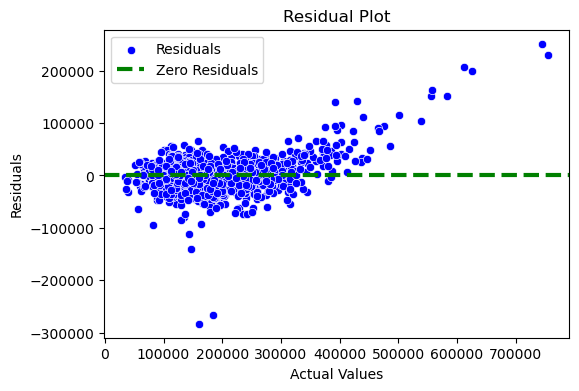

In [211]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_train, y=(y_train - ypred_train_lr), color='blue', label='Residuals')
plt.axhline(y=0, color='green', linestyle='--', linewidth=3, label='Zero Residuals')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend()
plt.show()


## Distribution of residuals

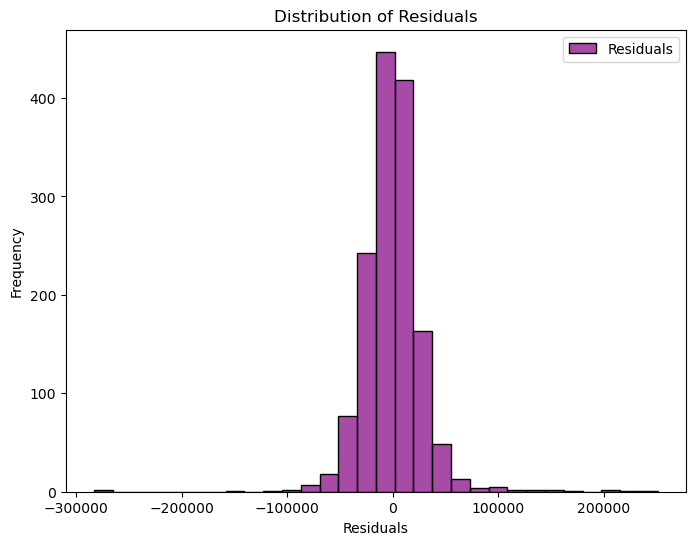

In [212]:
plt.figure(figsize=(8, 6))
sns.histplot(y_train - ypred_train_lr, bins=30, color='purple', alpha=0.7, label='Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.legend()
plt.show()

# Actual vs predicted (train data)

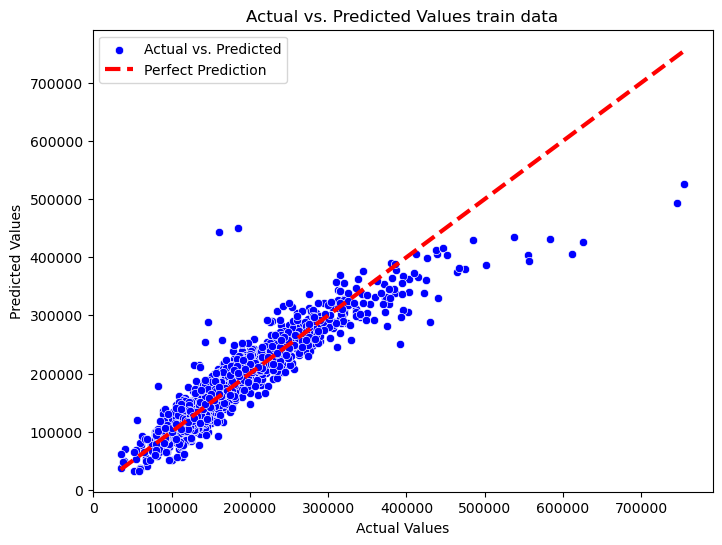

In [213]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_train,
            y=ypred_train_lr, color='blue', label='Actual vs. Predicted')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='red', linewidth=3, 
         label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values train data')
plt.legend()
plt.show()

# Analysing the Prediction 

#### Inferences from the prediction 

In [214]:
# getting the actual values and predicted values of test
b=pd.DataFrame({'PREDICTED SALEPRICE': ypred_test_lr})

In [215]:
# predicted price on test data 
b

PREDICTED SALEPRICE
0            88296.309600
1           147796.228649
2           153204.618837
3           175713.951059
4           200925.220755
...                   ...
1454        126013.134838
1455         84837.950453
1456        209869.519731
1457        124869.092673
1458        243354.398936

[1459 rows x 1 columns]

#concating actual and predicted of test and train
c=pd.concat([a,b])
c

In [216]:
xtest

Id  MSSubClass MSZoning  LotFrontage  LotArea Street     Alley  \
0     1461          20       RH         80.0    11622   Pave  noaccess   
1     1462          20       RL         81.0    14267   Pave  noaccess   
2     1463          60       RL         74.0    13830   Pave  noaccess   
3     1464          60       RL         78.0     9978   Pave  noaccess   
4     1465         120       RL         43.0     5005   Pave  noaccess   
...    ...         ...      ...          ...      ...    ...       ...   
1454  2915         160       RM         21.0     1936   Pave  noaccess   
1455  2916         160       RM         21.0     1894   Pave  noaccess   
1456  2917          20       RL        160.0    20000   Pave  noaccess   
1457  2918          85       RL         62.0    10441   Pave  noaccess   
1458  2919          60       RL         74.0     9627   Pave  noaccess   

     LotShape LandContour Utilities LotConfig LandSlope Neighborhood  \
0         Reg         Lvl    AllPub    Inside       Gtl        NAmes   
1         IR1         Lvl    AllPub    Corner       Gtl        NAmes   
2         IR1         Lvl    AllPub    Inside       Gtl      Gilbert   
3         IR1         Lvl    AllPub    Inside       Gtl      Gilbert   
4         IR1         HLS    AllPub    Inside       Gtl      StoneBr   
...       ...         ...       ...       ...       ...          ...   
1454      Reg         Lvl    AllPub    Inside       Gtl      MeadowV   
1455      Reg         Lvl    AllPub    Inside       Gtl      MeadowV   
1456      Reg         Lvl    AllPub    Inside       Gtl      Mitchel   
1457      Reg         Lvl    AllPub    Inside       Gtl      Mitchel   
1458      Reg         Lvl    AllPub    Inside       Mod      Mitchel   

     Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  \
0         Feedr       Norm     1Fam     1Story            5            6   
1          Norm       Norm     1Fam     1Story            6            6   
2          Norm       Norm     1Fam     2Story            5            5   
3          Norm       Norm     1Fam     2Story            6            6   
4          Norm       Norm   TwnhsE     1Story            8            5   
...         ...        ...      ...        ...          ...          ...   
1454       Norm       Norm    Twnhs     2Story            4            7   
1455       Norm       Norm   TwnhsE     2Story            4            5   
1456       Norm       Norm     1Fam     1Story            5            7   
1457       Norm       Norm     1Fam     SFoyer            5            5   
1458       Norm       Norm     1Fam     2Story            7            5   

      YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  \
0          1961          1961     Gable  CompShg     VinylSd     VinylSd   
1          1958          1958       Hip  CompShg     Wd Sdng     Wd Sdng   
2          1997          1998     Gable  CompShg     VinylSd     VinylSd   
3          1998          1998     Gable  CompShg     VinylSd     VinylSd   
4          1992          1992     Gable  CompShg     HdBoard     HdBoard   
...         ...           ...       ...      ...         ...         ...   
1454       1970          1970     Gable  CompShg     CemntBd     CmentBd   
1455       1970          1970     Gable  CompShg     CemntBd     CmentBd   
1456       1960          1996     Gable  CompShg     VinylSd     VinylSd   
1457       1992          1992     Gable  CompShg     HdBoard     Wd Shng   
1458       1993          1994     Gable  CompShg     HdBoard     HdBoard   

     MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0          None         0.0        TA        TA     CBlock       TA       TA   
1       BrkFace       108.0        TA        TA     CBlock       TA       TA   
2          None         0.0        TA        TA      PConc       Gd       Gd   
3       BrkFace        20.0        TA        TA      PConc       TA       TA   
4          None         0.0 

In [217]:
# merging these values to the oroginal data frame. 
final_df=xtest.join(b)

In [218]:
final_df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street     Alley  \
0     1461          20       RH         80.0    11622   Pave  noaccess   
1     1462          20       RL         81.0    14267   Pave  noaccess   
2     1463          60       RL         74.0    13830   Pave  noaccess   
3     1464          60       RL         78.0     9978   Pave  noaccess   
4     1465         120       RL         43.0     5005   Pave  noaccess   
...    ...         ...      ...          ...      ...    ...       ...   
1454  2915         160       RM         21.0     1936   Pave  noaccess   
1455  2916         160       RM         21.0     1894   Pave  noaccess   
1456  2917          20       RL        160.0    20000   Pave  noaccess   
1457  2918          85       RL         62.0    10441   Pave  noaccess   
1458  2919          60       RL         74.0     9627   Pave  noaccess   

     LotShape LandContour Utilities LotConfig LandSlope Neighborhood  \
0         Reg         Lvl    AllPub    Inside       Gtl        NAmes   
1         IR1         Lvl    AllPub    Corner       Gtl        NAmes   
2         IR1         Lvl    AllPub    Inside       Gtl      Gilbert   
3         IR1         Lvl    AllPub    Inside       Gtl      Gilbert   
4         IR1         HLS    AllPub    Inside       Gtl      StoneBr   
...       ...         ...       ...       ...       ...          ...   
1454      Reg         Lvl    AllPub    Inside       Gtl      MeadowV   
1455      Reg         Lvl    AllPub    Inside       Gtl      MeadowV   
1456      Reg         Lvl    AllPub    Inside       Gtl      Mitchel   
1457      Reg         Lvl    AllPub    Inside       Gtl      Mitchel   
1458      Reg         Lvl    AllPub    Inside       Mod      Mitchel   

     Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  \
0         Feedr       Norm     1Fam     1Story            5            6   
1          Norm       Norm     1Fam     1Story            6            6   
2          Norm       Norm     1Fam     2Story            5            5   
3          Norm       Norm     1Fam     2Story            6            6   
4          Norm       Norm   TwnhsE     1Story            8            5   
...         ...        ...      ...        ...          ...          ...   
1454       Norm       Norm    Twnhs     2Story            4            7   
1455       Norm       Norm   TwnhsE     2Story            4            5   
1456       Norm       Norm     1Fam     1Story            5            7   
1457       Norm       Norm     1Fam     SFoyer            5            5   
1458       Norm       Norm     1Fam     2Story            7            5   

      YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  \
0          1961          1961     Gable  CompShg     VinylSd     VinylSd   
1          1958          1958       Hip  CompShg     Wd Sdng     Wd Sdng   
2          1997          1998     Gable  CompShg     VinylSd     VinylSd   
3          1998          1998     Gable  CompShg     VinylSd     VinylSd   
4          1992          1992     Gable  CompShg     HdBoard     HdBoard   
...         ...           ...       ...      ...         ...         ...   
1454       1970          1970     Gable  CompShg     CemntBd     CmentBd   
1455       1970          1970     Gable  CompShg     CemntBd     CmentBd   
1456       1960          1996     Gable  CompShg     VinylSd     VinylSd   
1457       1992          1992     Gable  CompShg     HdBoard     Wd Shng   
1458       1993          1994     Gable  CompShg     HdBoard     HdBoard   

     MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0          None         0.0        TA        TA     CBlock       TA       TA   
1       BrkFace       108.0        TA        TA     CBlock       TA       TA   
2          None         0.0        TA        TA      PConc       Gd       Gd   
3       BrkFace        20.0        TA        TA      PConc       TA       TA   
4          None         0.0 

# Neighbourhood vs saleprice

In [424]:
# get the price based on neighbourhood 
final_df.groupby(['Neighborhood'])[['PREDICTED SALEPRICE']].mean().\
sort_values(by='PREDICTED SALEPRICE')

PREDICTED SALEPRICE
Neighborhood                     
MeadowV             122187.483575
IDOTRR              123530.268032
Edwards             130250.627516
NAmes               135316.954951
Sawyer              140986.493784
BrkSide             150732.677798
ClearCr             151555.333186
OldTown             153798.126077
Mitchel             155423.706745
NPkVill             159075.670152
SWISU               159431.968853
BrDale              159868.446676
NWAmes              167970.515394
Blmngtn             167982.627536
Blueste             169780.693621
Crawfor             176210.774628
SawyerW             190047.223441
CollgCr             198071.537255
Timber              207066.948706
Veenker             209402.741741
Gilbert             217089.178134
Somerst             218718.321889
StoneBr             250958.585284
NridgHt             251510.307357
NoRidge             254265.693688

# salecondition vs saleprice 

In [408]:
final_df.groupby(['SaleCondition'])[['PREDICTED SALEPRICE']].mean().sort_values(by='PREDICTED SALEPRICE')

PREDICTED SALEPRICE
SaleCondition                     
AdjLand              106723.071215
Abnorml              130066.697625
Alloca               139770.738677
Normal               170799.932881
Family               172038.685256
Partial              242558.208655

# HouseStyle,RoofStyle vs saleprice

In [409]:
final_df.groupby(['HouseStyle','RoofStyle'])[['PREDICTED SALEPRICE']].mean().sort_values(by='PREDICTED SALEPRICE')

PREDICTED SALEPRICE
HouseStyle RoofStyle                     
1Story     Mansard           96089.717031
SFoyer     Flat             119760.976766
           Hip              122074.889502
1.5Unf     Gable            131943.570449
2.5Unf     Hip              144008.793551
SFoyer     Gable            145685.569395
1Story     Gable            146907.130242
SLvl       Hip              151524.921866
1.5Fin     Gable            152059.437726
1Story     Flat             155093.408652
2Story     Gambrel          160299.723782
SLvl       Gable            163500.278127
1Story     Gambrel          172386.085232
           Hip              178508.561309
2Story     Flat             195986.008430
1.5Fin     Gambrel          197287.391170
2.5Unf     Gable            200527.249286
1Story     Shed             202050.640346
2Story     Gable            212259.828913
1.5Fin     Hip              225992.110695
2Story     Mansard          248244.767498
           Hip              269002.373090

# Neighborhood,HouseStyle vs PREDICTED SALEPRICE

In [414]:
final_df.groupby(['Neighborhood','HouseStyle'])[['PREDICTED SALEPRICE']].mean()\
.sort_values(by='PREDICTED SALEPRICE', ascending=False).head(10)

PREDICTED SALEPRICE
Neighborhood HouseStyle                     
StoneBr      2Story            325538.108801
NridgHt      2Story            295982.171003
NoRidge      1.5Fin            292465.395939
Edwards      2.5Unf            265981.501696
NoRidge      2Story            256104.874490
Veenker      2Story            250374.579054
Somerst      2Story            244564.135446
SWISU        2.5Unf            232810.038772
CollgCr      2Story            231759.270292
Mitchel      1.5Fin            231044.679197

In [415]:
final_df.groupby(['Neighborhood','HouseStyle'])[['PREDICTED SALEPRICE']].mean()\
.sort_values(by='PREDICTED SALEPRICE', ascending=False).tail(10)

PREDICTED SALEPRICE
Neighborhood HouseStyle                     
ClearCr      1.5Fin            118931.106713
Edwards      1Story            117551.844649
             SLvl              116943.434415
MeadowV      1Story            115174.241026
IDOTRR       1Story            104973.711163
             1.5Unf             83121.295248
             2.5Unf             73084.351810
OldTown      SLvl               70789.285030
IDOTRR       SFoyer             69752.457930
ClearCr      SLvl               38446.020630

In [356]:
plt.style.use('_classic_test_patch')

# SaleCondition,SaleType vs PREDICTED SALEPRICE

In [416]:
final_df.groupby(['SaleCondition','SaleType'])[['PREDICTED SALEPRICE']].mean().\
sort_values(by='PREDICTED SALEPRICE',ascending=False)


PREDICTED SALEPRICE
SaleCondition SaleType                     
Normal        ConLI           270532.530619
Partial       New             243864.049576
              Con             239215.045136
Family        WD              190633.284863
Normal        CWD             180494.486696
              WD              171970.526284
Partial       WD              167838.096576
Family        ConLD           153732.818902
Normal        Con             148445.866185
Alloca        WD              139770.738677
Normal        ConLD           135932.569685
Family        ConLw           135733.964517
Abnorml       WD              133590.919392
Normal        COD             133408.023363
Abnorml       ConLD           132360.855089
Family        Oth             127987.734435
Abnorml       COD             122836.083132
Family        ConLI           113695.241143
Abnorml       Oth             113121.482992
AdjLand       WD              106723.071215
Normal        ConLw           105745.739674
Family        COD             103064.202057
Abnorml       ConLI            98710.516982
Normal        Oth              87140.681778

# SaleCondition, Fence vs PREDICTED SALEPRICE

In [419]:
final_df.groupby(['SaleCondition','Fence'])[['PREDICTED SALEPRICE']].mean().\
sort_values(by='PREDICTED SALEPRICE',ascending=False)


PREDICTED SALEPRICE
SaleCondition Fence                       
Partial       nofence        243824.651233
Normal        GdPrv          175190.289872
              nofence        174666.982053
Family        nofence        174594.739585
Partial       MnPrv          167838.096576
Abnorml       GdPrv          159524.910885
Family        MnPrv          159103.307945
              GdWo           154611.621946
Normal        GdWo           153570.364146
              MnPrv          151359.120747
Alloca        nofence        148735.273954
Abnorml       nofence        135948.216461
Normal        MnWw           125354.411744
Alloca        MnPrv          122950.570664
AdjLand       GdPrv          111139.840929
              MnPrv          106689.901117
Abnorml       MnPrv          106422.165138
AdjLand       nofence        105852.985311
Alloca        GdPrv           92730.257214
Abnorml       GdWo            73691.583784

# Foundation ,LotConfig vs PREDICTED SALEPRICE

In [422]:
final_df.groupby(['Foundation','LotConfig'])[['PREDICTED SALEPRICE']].mean().\
sort_values(by='PREDICTED SALEPRICE',ascending=False)

PREDICTED SALEPRICE
Foundation LotConfig                     
PConc      CulDSac          239314.594736
           FR3              219739.540907
           Corner           209619.240703
           Inside           209495.987914
Stone      Inside           193489.247436
PConc      FR2              186964.073623
BrkTil     FR3              182252.039287
CBlock     FR3              167518.920248
           CulDSac          152862.651898
BrkTil     Corner           147180.872043
           Inside           145248.373927
CBlock     Inside           142184.294824
           Corner           140794.537486
           FR2              139010.826130
Wood       Inside           137129.779577
BrkTil     FR2              132947.062723
Stone      Corner           131567.140987
Slab       FR2              124073.981512
           Inside           123453.691087
           CulDSac          122270.350187
           Corner           118717.368328
BrkTil     CulDSac           87710.730256

## 'SaleCondition','KitchenQual','Electrical','Heating' vs PREDICTED SALEPRICE'

In [362]:
final_df.groupby(['SaleCondition','KitchenQual','Electrical','Heating'])[['PREDICTED SALEPRICE']].mean().\
sort_values(by='PREDICTED SALEPRICE', ascending=False)


PREDICTED SALEPRICE
SaleCondition KitchenQual Electrical Heating                     
Family        Ex          SBrkr      GasA           334486.057056
Partial       Ex          SBrkr      GasA           283778.902767
Normal        Ex          SBrkr      GasA           253968.765180
Abnorml       Ex          SBrkr      GasA           236002.200603
Partial       Gd          SBrkr      GasA           227190.231595
Normal        Ex          FuseA      GasA           218677.080300
Family        Gd          SBrkr      GasA           214346.459008
Normal        Gd          SBrkr      GasA           199379.647335
Family        Ex          FuseF      GasA           181320.596780
Abnorml       Gd          SBrkr      GasW           177936.720805
Normal        Fa          SBrkr      GasW           169980.087684
Abnorml       Gd          SBrkr      GasA           162362.716499
Normal        Gd          FuseA      GasA           160625.792923
Abnorml       TA          FuseF      GasA           155227.182618
Normal        Fa          FuseA      GasA           151458.431830
Family        TA          SBrkr      GasA           149309.314106
Normal        Fa          SBrkr      GasA           149240.017159
              TA          SBrkr      GasW           147636.152051
                                     GasA           146797.756691
Alloca        Gd          SBrkr      GasA           145440.891302
Partial       TA          SBrkr      GasA           143982.369557
Alloca        TA          SBrkr      GasA           138636.708153
Normal        TA          FuseA      GasA           135109.545376
AdjLand       TA          FuseA      Grav           132783.455082
Family        TA          FuseA      GasA           131983.076783
Normal        Fa          FuseF      GasA           122248.585472
Abnorml       TA          SBrkr      GasA           119784.730122
Normal        Gd          FuseF      GasA           119385.597074
              TA          FuseF      GasA           116113.433751
Abnorml       Fa          FuseF      Grav           115340.578240
Normal        TA          FuseF      Wall           110446.910994
AdjLand       TA          SBrkr      GasA           109659.747042
Abnorml       TA          FuseA      GasA           109620.803644
AdjLand       TA          FuseA      GasA           106689.901117
Normal        TA          FuseP      GasA           104074.857754
Family        TA          FuseF      GasA           102477.398714
Abnorml       Fa          FuseA      Wall            93723.133759
                          FuseF      GasA            90653.725520
AdjLand       TA          FuseF      GasA            89321.035640
Normal        Fa          FuseP      GasA            83121.295248
Abnorml       Gd          FuseA      GasA            65861.827755
              TA          SBrkr      GasW            63100.350987

## 'Street','Alley','LotConfig','LotShape','LandContour' vs PREDICTED SALEPRICE

In [224]:
final_df.groupby(['Street','Alley','LotConfig','LotShape','LandContour'])\
[['PREDICTED SALEPRICE']].mean().sort_values(by='PREDICTED SALEPRICE', ascending=False)


PREDICTED SALEPRICE
Street Alley    LotConfig LotShape LandContour                     
Pave   noaccess CulDSac   IR3      Lvl                340974.875899
                          IR1      HLS                283301.188021
                Corner    IR1      HLS                257908.984731
                                   Low                238928.428326
                Inside    IR1      HLS                232539.168198
                CulDSac   IR2      Lvl                230969.678143
                Inside    IR3      Lvl                226728.632390
                          IR1      Low                219082.455437
       Pave     Corner    IR1      Lvl                218174.011505
       noaccess Corner    IR3      Lvl                217623.982768
       Pave     Inside    IR1      Lvl                213223.864171
       noaccess FR3       IR1      Lvl                204272.303632
       Pave     Inside    Reg      Lvl                203000.745521
       noaccess FR3       Reg      Lvl                200236.198948
                Inside    IR1      Lvl                197721.784883
                Corner    IR1      Lvl                196307.318240
                          IR2      Lvl                195080.898168
                FR2       IR2      Lvl                192483.708773
       Pave     Inside    Reg      Bnk                189397.950753
       noaccess Inside    IR2      Lvl                189255.370162
                CulDSac   IR1      Lvl                186174.801203
                Inside    Reg      HLS                185259.107799
                FR2       IR1      Lvl                181516.541192
                Corner    IR2      Bnk                178822.360202
                          Reg      HLS                174111.070129
                Inside    IR1      Bnk                172665.804434
                CulDSac   IR1      Bnk                168659.053060
                Inside    Reg      Lvl                166219.579410
                CulDSac   Reg      Lvl                166109.608104
                          IR1      Low                162469.378044
                Corner    Reg      Lvl                159879.530919
                FR2       Reg      Lvl                158638.557059
                Corner    IR1      Bnk                158369.595083
                FR2       Reg      Low                156890.813984
       Grvl     Corner    Reg      Lvl                153565.780616
       noaccess Corner    Reg      Bnk                152629.333610
Grvl   noaccess Inside    IR1      Lvl                147214.964004
Pave   Pave     Inside    IR2      Lvl                144474.255820
       noaccess Inside    Reg      Bnk                143372.850574
       Grvl     Inside    Reg      Lvl                142853.025850
                                   Bnk                142406.053352
       noaccess Inside    IR2      Low                140263.336805
       Grvl     Inside    IR1      HLS                139122.815596
       noaccess Inside    Reg      Low                129751.870721
                FR2       Reg      Bnk                121790.279905
                          IR1      Bnk                107691.623575
Grvl   noaccess Inside    Reg      Bnk                 98645.860810
Pave   noaccess Corner    IR3      Bnk                 96051.486937
Grvl   noaccess Inside    Reg      Lvl                 95121.258501
Pave   noaccess Inside    IR2      HLS                 80126.164340
       Pave     Corner    Reg      Lvl                 77244.867790
Grvl   noaccess Corner    Reg      Lvl                 58939.415043

#### 'Neighborhood','LotConfig','Foundation','SaleCondition','HouseStyle','KitchenQual','GarageQual','Electrical', 'Heating','Street','Exterior1st' vs price

In [375]:
final_df.groupby(['Neighborhood','LotConfig','Foundation','SaleCondition','HouseStyle','KitchenQual','GarageQual',
                  'Electrical',
                  'Heating','Street','Exterior1st'])\
[['PREDICTED SALEPRICE']].mean().\
sort_values(by='PREDICTED SALEPRICE', ascending=False).head(10)

PREDICTED SALEPRICE
Neighborhood LotConfig Foundation SaleCondition HouseStyle KitchenQual GarageQual Electrical Heating Street Exterior1st                     
StoneBr      CulDSac   PConc      Partial       2Story     Ex          TA         SBrkr      GasA    Pave   CemntBd            401524.445826
Somerst      Inside    PConc      Partial       2Story     Ex          TA         SBrkr      GasA    Pave   WdShing            364326.976234
NridgHt      Inside    PConc      Normal        2Story     Ex          TA         SBrkr      GasA    Pave   CemntBd            359138.625186
StoneBr      CulDSac   PConc      Partial       2Story     Gd          TA         SBrkr      GasA    Pave   VinylSd            356259.378758
             Corner    PConc      Partial       2Story     Ex          TA         SBrkr      GasA    Pave   VinylSd            345422.376503
NoRidge      Inside    PConc      Normal        2Story     Ex          TA         SBrkr      GasA    Pave   MetalSd            344154.599715
NridgHt      CulDSac   PConc      Normal        2Story     Ex          TA         SBrkr      GasA    Pave   MetalSd            339703.311018
Gilbert      Corner    PConc      Partial       2Story     Gd          TA         SBrkr      GasA    Pave   VinylSd            337129.832395
StoneBr      CulDSac   PConc      Partial       2Story     Ex          TA         SBrkr      GasA    Pave   VinylSd            335952.737526
NridgHt      CulDSac   PConc      Family        2Story     Ex          TA         SBrkr      GasA    Pave   VinylSd            334486.057056

In [376]:
final_df.groupby(['Neighborhood','LotConfig','Foundation','SaleCondition','HouseStyle','KitchenQual','GarageQual',
                  'Electrical',
                  'Heating','Street','Exterior1st'])\
[['PREDICTED SALEPRICE']].mean().\
sort_values(by='PREDICTED SALEPRICE', ascending=False).tail(10)

PREDICTED SALEPRICE
Neighborhood LotConfig Foundation SaleCondition HouseStyle KitchenQual GarageQual Electrical Heating Street Exterior1st                     
IDOTRR       Corner    BrkTil     Normal        1.5Fin     TA          TA         SBrkr      GasA    Pave   MetalSd             51575.012356
Mitchel      Inside    CBlock     Abnorml       1Story     TA          TA         SBrkr      GasA    Pave   Plywood             49402.865246
IDOTRR       Inside    BrkTil     Normal        1Story     TA          NoGarage   FuseA      GasA    Pave   Wd Sdng             49167.135824
OldTown      Inside    BrkTil     Normal        1.5Fin     Gd          TA         SBrkr      GasA    Pave   MetalSd             48209.132791
IDOTRR       Inside    Slab       Abnorml       1Story     TA          NoGarage   SBrkr      GasA    Pave   Wd Sdng             47747.060238
BrkSide      Inside    BrkTil     Normal        1Story     TA          TA         SBrkr      GasA    Pave   WdShing             47324.660696
OldTown      Inside    BrkTil     Abnorml       1Story     TA          Fa         SBrkr      GasA    Pave   AsbShng             42308.786170
IDOTRR       Corner    CBlock     Abnorml       1Story     TA          NoGarage   SBrkr      GasA    Pave   AsbShng             40581.418006
ClearCr      Inside    CBlock     Normal        SLvl       TA          TA         SBrkr      GasA    Pave   Wd Sdng             38446.020630
OldTown      Corner    BrkTil     Normal        1Story     TA          TA         FuseA      GasA    Pave   VinylSd             36584.832956

In [230]:
high_bud=final_df.groupby(['Neighborhood','Alley','SaleCondition','HouseStyle','Functional','BldgType','BedroomAbvGr','FullBath',
                  'GarageType'])\
[['PREDICTED SALEPRICE']].mean().\
sort_values(by='PREDICTED SALEPRICE', ascending=False).head(10)

In [228]:
low_bud=final_df.groupby(['Neighborhood','Alley','SaleCondition','HouseStyle','Functional','BldgType','BedroomAbvGr','FullBath',
                  'GarageType'])\
[['PREDICTED SALEPRICE']].mean().\
sort_values(by='PREDICTED SALEPRICE', ascending=False).tail(10)

# Brief summary of analysis

#### LOW BUDGET HOUSES ARE 

In [229]:
# low bugdet houses are 
low_bud

PREDICTED SALEPRICE
Neighborhood Alley    SaleCondition HouseStyle Functional BldgType BedroomAbvGr FullBath GarageType                     
IDOTRR       noaccess Normal        1.5Fin     Maj2       1Fam     1            1        Detchd             50228.344698
OldTown      noaccess Abnorml       1Story     Typ        1Fam     1            1        Detchd             49662.525429
IDOTRR       noaccess Abnorml       1Story     Typ        1Fam     2            1        NoGarage           49023.720450
ClearCr      noaccess Normal        SLvl       Typ        1Fam     4            1        Attchd             47743.540062
Edwards      noaccess Normal        1Story     Min1       1Fam     2            1        Attchd             46684.680377
IDOTRR       noaccess Normal        1Story     Min1       1Fam     2            1        NoGarage           41809.393118
                      Abnorml       1Story     Mod        1Fam     2            1        NoGarage           39870.813823
Edwards      noaccess Normal        1Story     Min1       1Fam     2            1        Detchd             39167.557377
OldTown      noaccess Abnorml       1Story     Typ        1Fam     2            1        Detchd             36548.177471
             Grvl     Normal        1Story     Typ        1Fam     1            1        Detchd             28780.392814

#### HIGH BUDGET HOUSES ARE 

In [231]:
# high budget houses are 
high_bud

PREDICTED SALEPRICE
Neighborhood Alley    SaleCondition HouseStyle Functional BldgType BedroomAbvGr FullBath GarageType                     
StoneBr      noaccess Partial       2Story     Typ        1Fam     5            3        BuiltIn           396038.409996
                                                                   4            2        BuiltIn           367768.891466
NridgHt      noaccess Normal        1Story     Typ        1Fam     1            1        Attchd            357223.194841
NoRidge      noaccess Normal        2Story     Typ        1Fam     4            3        Attchd            355124.409608
StoneBr      noaccess Partial       2Story     Typ        1Fam     4            2        Attchd            353976.702397
                                    1Story     Typ        1Fam     4            2        Attchd            349259.930852
                                    2Story     Typ        1Fam     4            3        BuiltIn           342710.971428
NridgHt      noaccess Family        2Story     Typ        1Fam     5            2        BuiltIn           340974.875899
ClearCr      noaccess Normal        1Story     Typ        1Fam     0            0        Attchd            339035.138662
Edwards      noaccess Partial       1Story     Typ        1Fam     2            2        Attchd            331868.945329

#* houses has average high prices in the neighbourhood of MeadowV followed by IDOTRR and average lowest at NridgHt 
and NoRidge

#* If the sale condition is partial the average prices are high and for Adjoining Land Purchase price is low. 

#* 1Story with Mansard roof style has the lowest average price and 2Story with Hip roofstle has the 
highest averge price.

#* 2Story houses StoneBr neghbourhood has the highest pridcted price. 

#* SLvl(Split Level) houses ClearCr neghbourhood has the lowest pridcted price. 

#* sale condition of Normal and saletype as ConLI (Contract Low Interest) has the highest average price 
while Normal with Oth sale type has the lowest averge price

#* sale condition is Partial nofence has high value while Abnorml with GdWo (Good Wood) has the lowest average.

#* houses with SaleCondition as Family, KitchenQual as Excellent , Electrical as Standard Circuit Breakers 
& Romex and Heating as GasA has high average prices 

 

In [ ]:
# For better inferences further analysis can be done in future. 

In [ ]:
Thank you 